# Exploratory Data Analysis
## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
%matplotlib inline
import datetime



from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [2]:
# Set plot style
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('fivethirtyeight')

In [3]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. 

In [4]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')
churn_df = pd.read_csv('./churn_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [7]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Descriptive statistics of data

### Data types


To get an overview of the data types within a data frame, use the `info()` method.

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
print('Total records in client dataset :{}'.format(client_df.shape[0]))
print('Total records in price dataset :{}'.format(price_df.shape[0]))

Total records in client dataset :14606
Total records in price dataset :193002


In [12]:
## Merge these two dataset 

churn_data = pd.merge(client_df,price_df,left_on='id', right_on='id', how='inner')
print('Total records in churn Dataset :{}'.format(churn_data.shape[0]))

Total records in churn Dataset :175149


In [13]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1/1/2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2/1/2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3/1/2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,4/1/2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,5/1/2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [14]:
churn_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,...,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,...,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,...,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


### Find Missing Data and Clean 

In [15]:
null_columns = churn_data.columns[churn_data.isnull().any()]
null_columns

Index([], dtype='object')

In [16]:
churn_data = churn_data.dropna()
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  int64  
 12  forecast_meter_r

### Check For Missing Values

In [17]:
#Check how much of our data is missing
pd.DataFrame({"Missing value (%)": client_df.isnull().sum()/len(client_df.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [18]:
pd.DataFrame({"Missing value (%)": price_df.isnull().sum()/len(price_df.index)*100})

,Missing value (%)
id,0.0
price_date,0.0
price_off_peak_var,0.0
price_peak_var,0.0
price_mid_peak_var,0.0
price_off_peak_fix,0.0
price_peak_fix,0.0
price_mid_peak_fix,0.0


####  The above churn data is completly clean and has no null values,its looking Fine after merging

### Churn

In [19]:
churn_data = client_df[['id', 'churn']]
churn_data.rename(columns={'id':'Companies'}, inplace=True)
churn_count = churn_data.groupby(['churn']).count().reset_index()
churn_count.rename(columns={'Companies' : 'Num'},inplace=True)
churn_count['Num'] = round((churn_count['Num']/churn_count['Num'].sum())*100,1)
churn_count.rename(columns={'Num' : 'Companies'},inplace=True)

In [20]:
churn_count

,churn,Companies
0,0,90.3
1,1,9.7


In [21]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

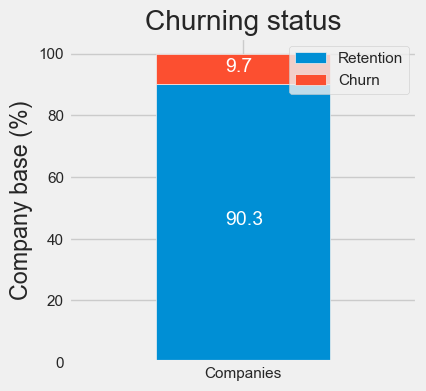

In [22]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (4, 4), legend_="upper right")

##### So by this Graph we can understand around 9.7% customers are churn customers and stopped using PoweCo Services 

### SME Activity

In [23]:
sme_activity = client_df[['id','channel_sales','churn']]
sme_activity.head()

,id,channel_sales,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0


In [24]:
# Number of companies under SME Activity

num_comp_per_sme_activity = sme_activity.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1)
num_comp_per_sme_activity

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,NaN
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,NaN
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


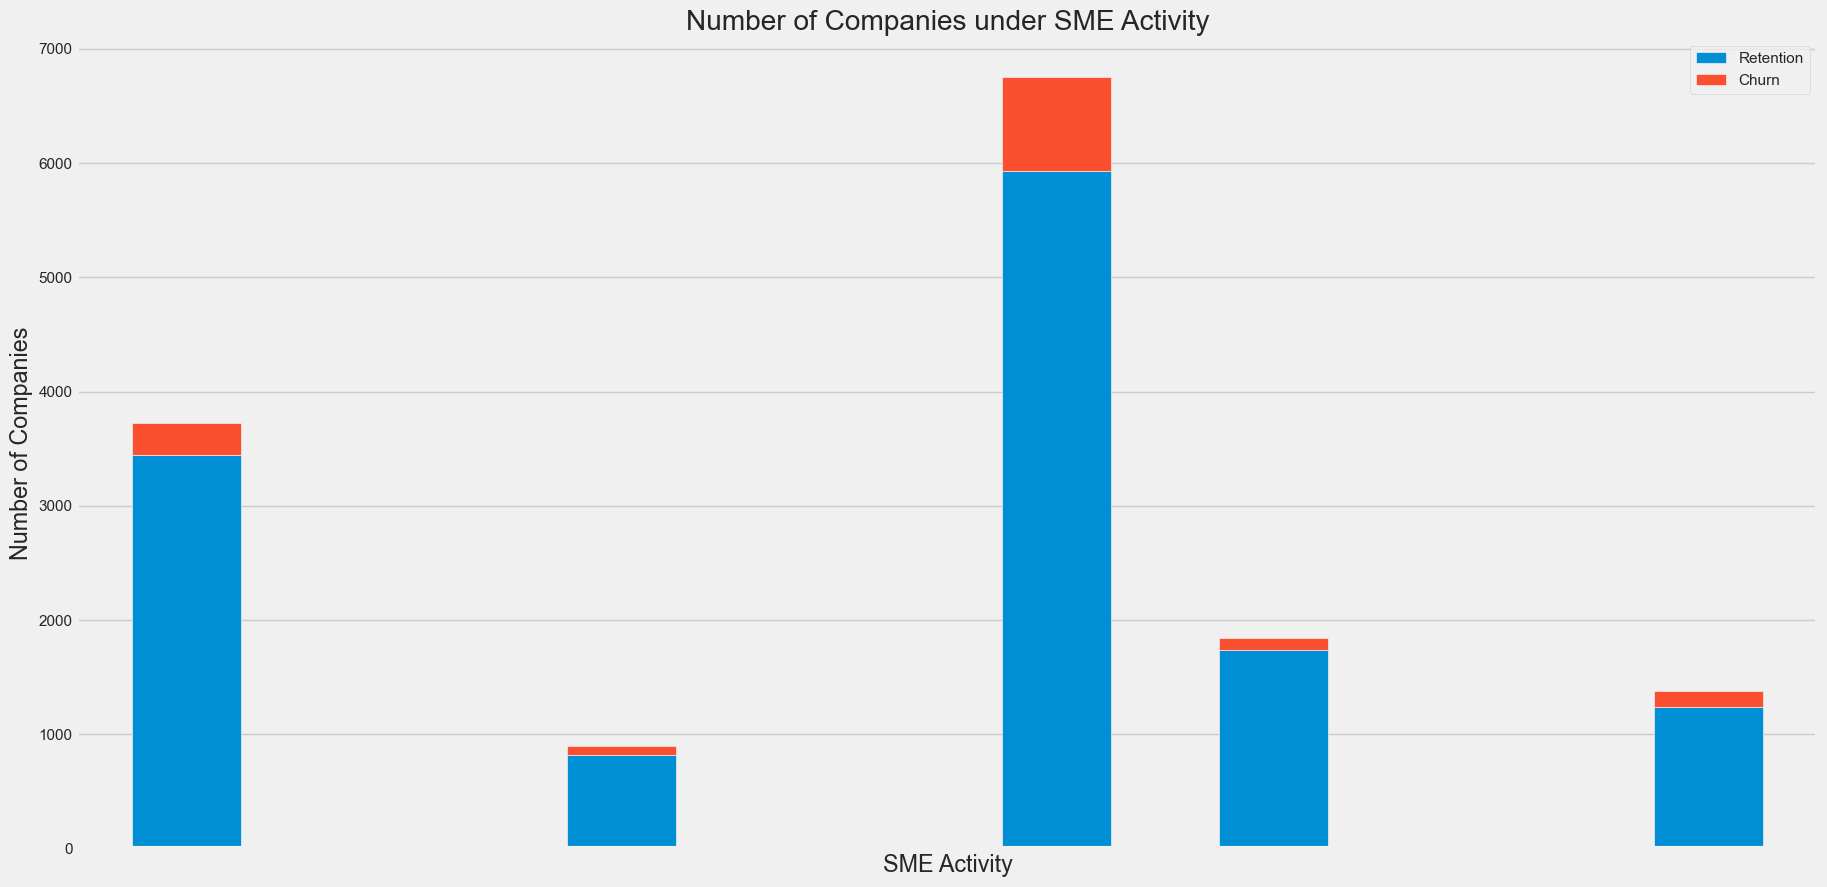

In [25]:
num_comp_per_sme_activity.plot(kind='bar', figsize=(20,10), width=0.5, stacked=True, title='Number of Companies under SME Activity')

plt.ylabel('Number of Companies')
plt.xlabel('SME Activity')

plt.legend(['Retention', 'Churn'])
plt.xticks([])
plt.show()

In [26]:
#Percentage wise

sme_activity_total = num_comp_per_sme_activity.fillna(0)[0]+num_comp_per_sme_activity.fillna(0)[1]
sme_activity_total_percentage =  num_comp_per_sme_activity.fillna(0)[1]/(sme_activity_total)*100
pd.DataFrame({'Churn Percentage': sme_activity_total_percentage, 'Number of Companies':sme_activity_total}).sort_values(
by='Churn Percentage', ascending=False).head(20)

,Churn Percentage,Number of Companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.140954,6754.0
usilxuppasemubllopkaafesmlibmsdf,10.036364,1375.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.398656,893.0
MISSING,7.597315,3725.0
lmkebamcaaclubfxadlmueccxoimlema,5.588714,1843.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,3.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,11.0


In [27]:
channel=client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [28]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

Text(0, 0.5, 'Company base(%)')

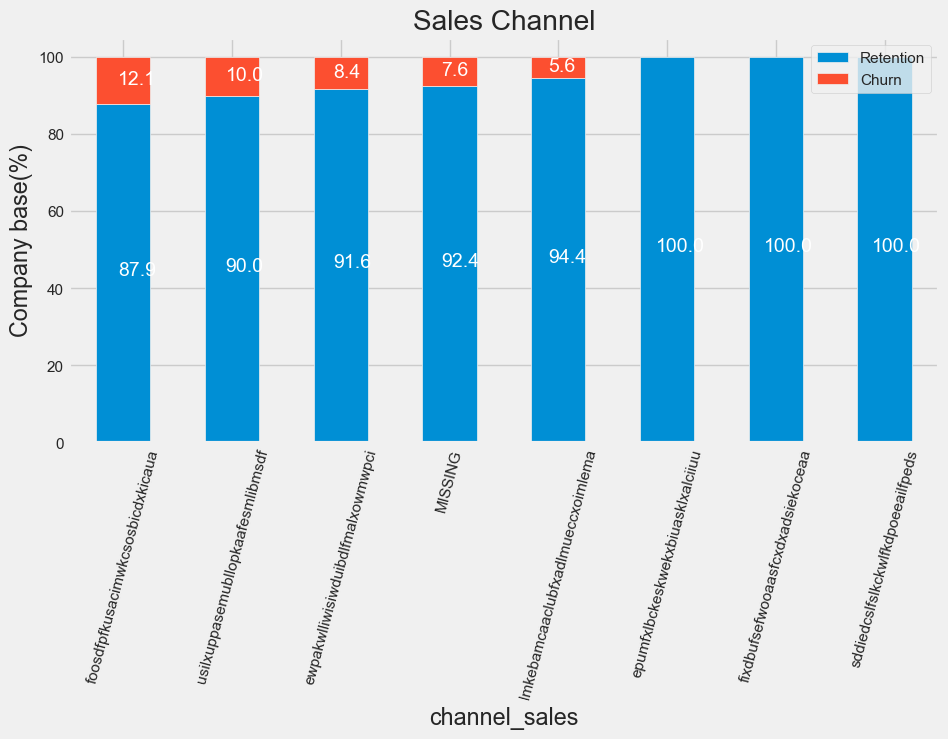

In [29]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,5),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

### Consumption

#### consumption of customer during the last month, 12 months against the churn

In [30]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]


In [31]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

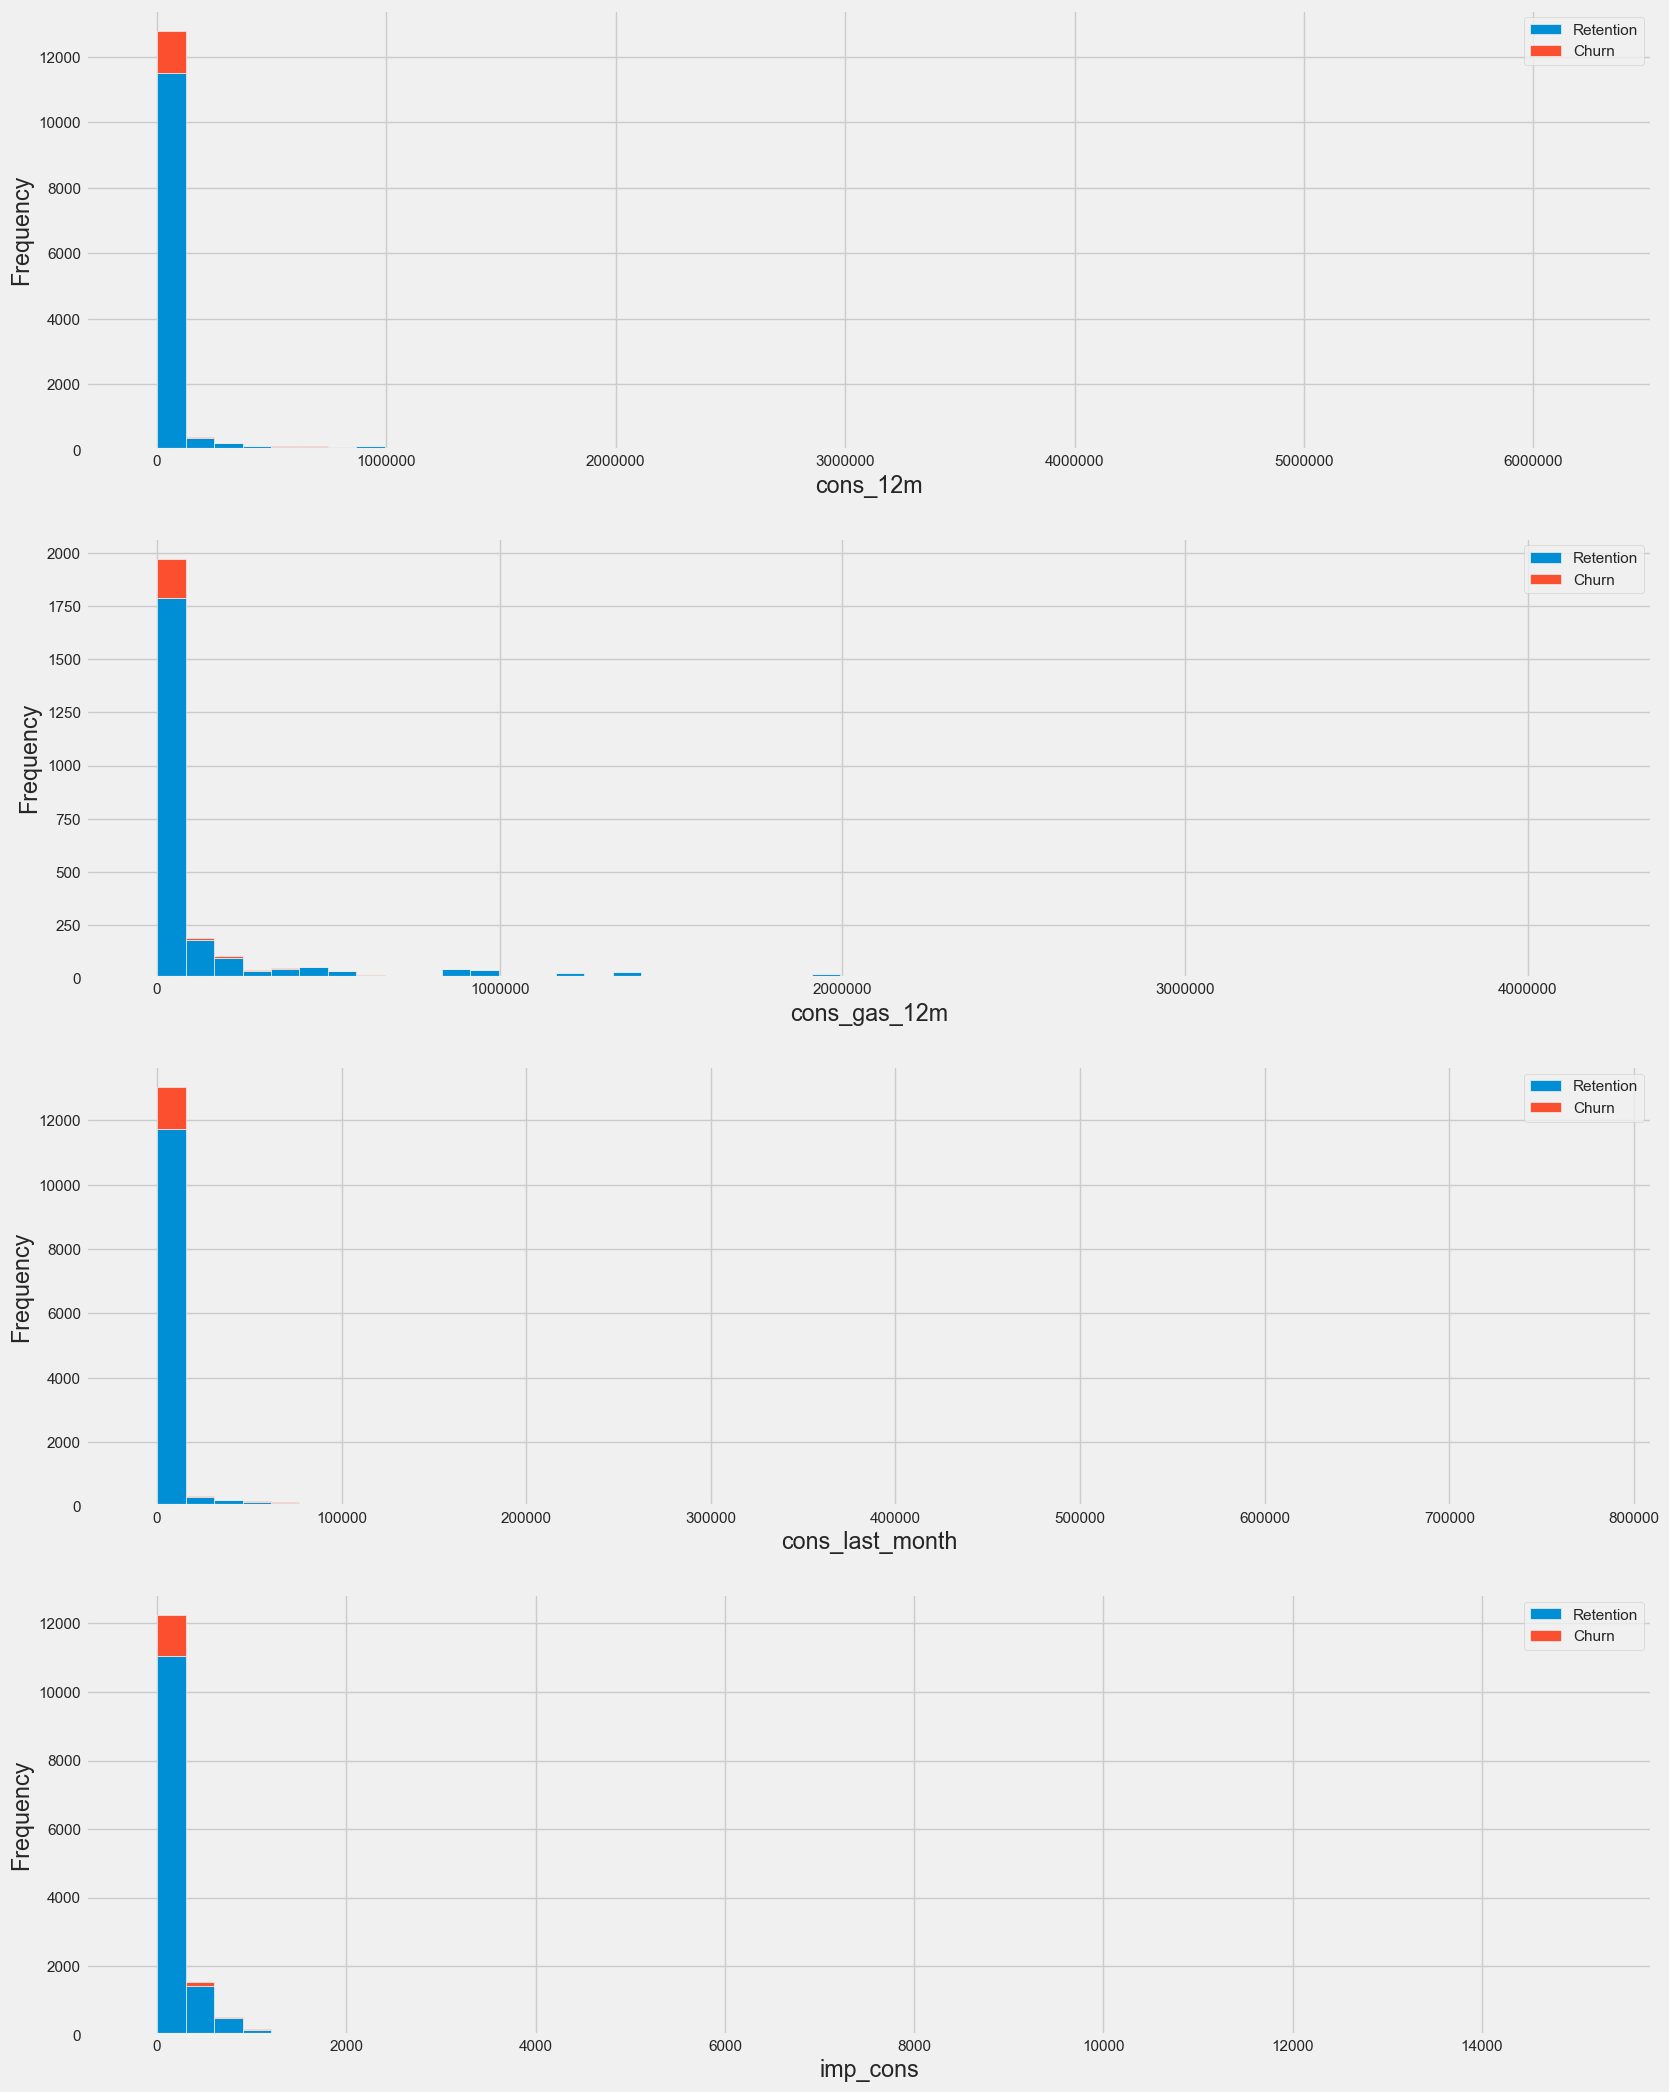

In [32]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])
    

### Forecast

In [33]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

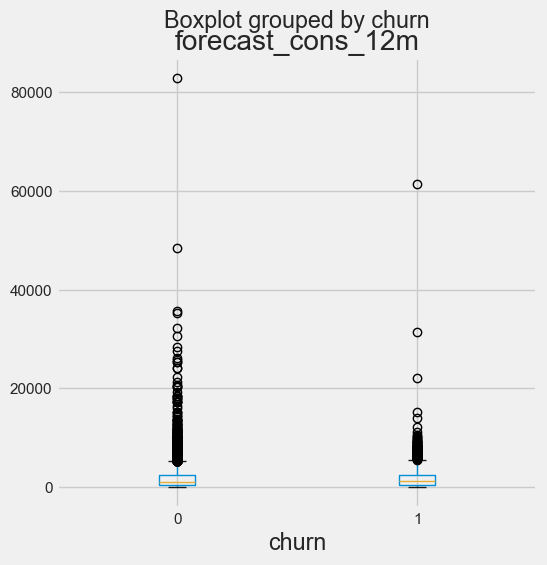

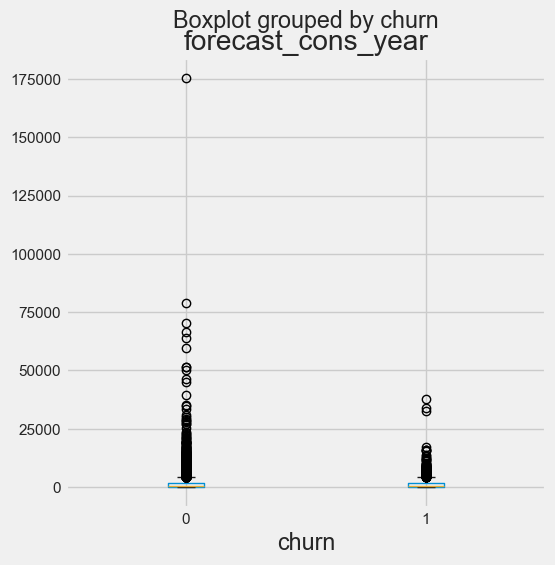

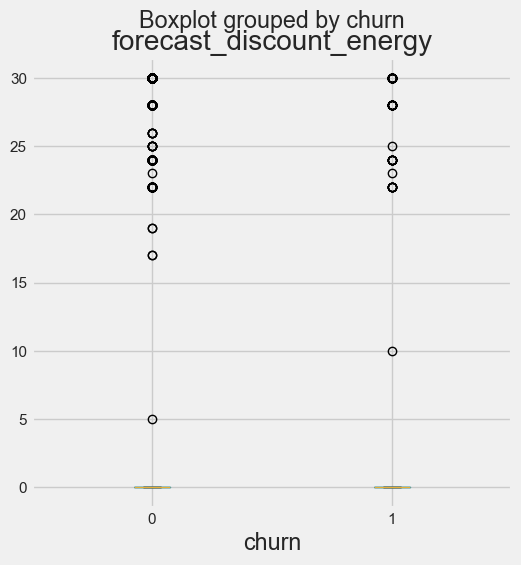

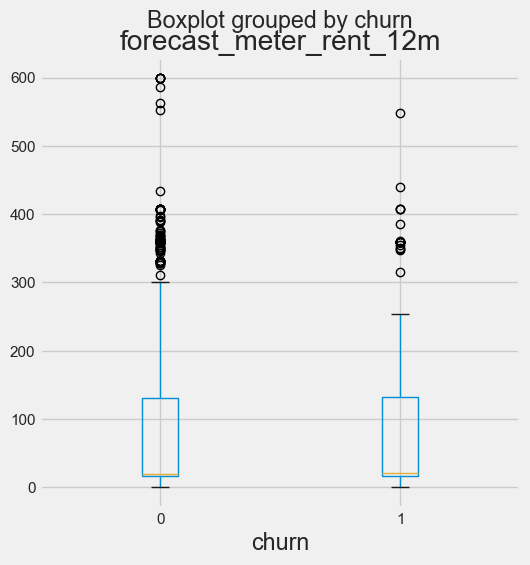

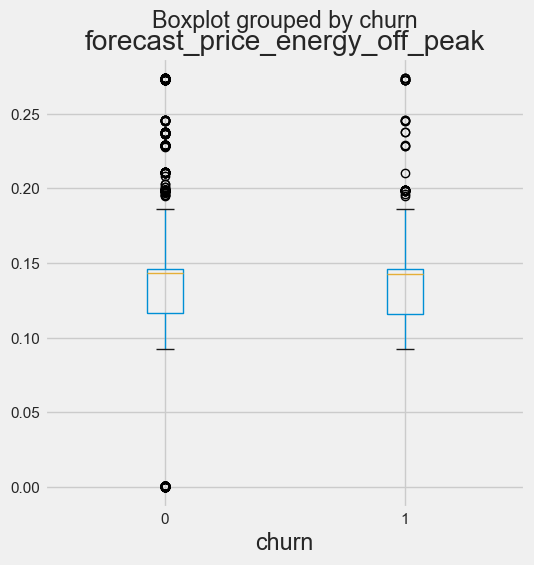

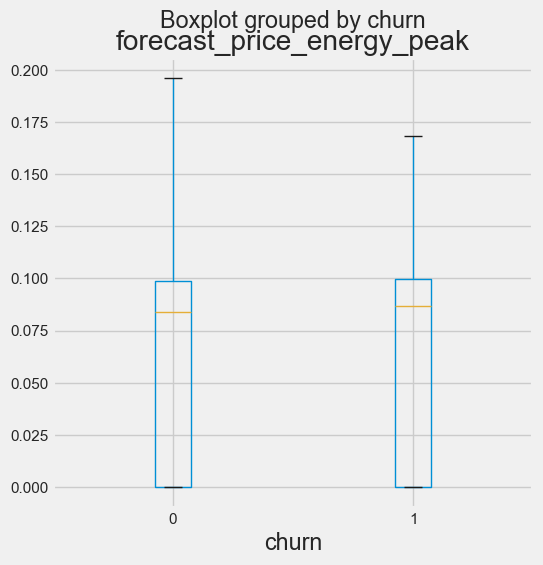

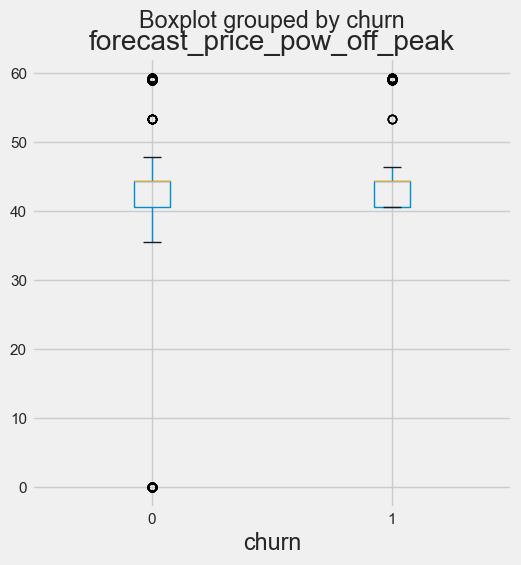

In [34]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

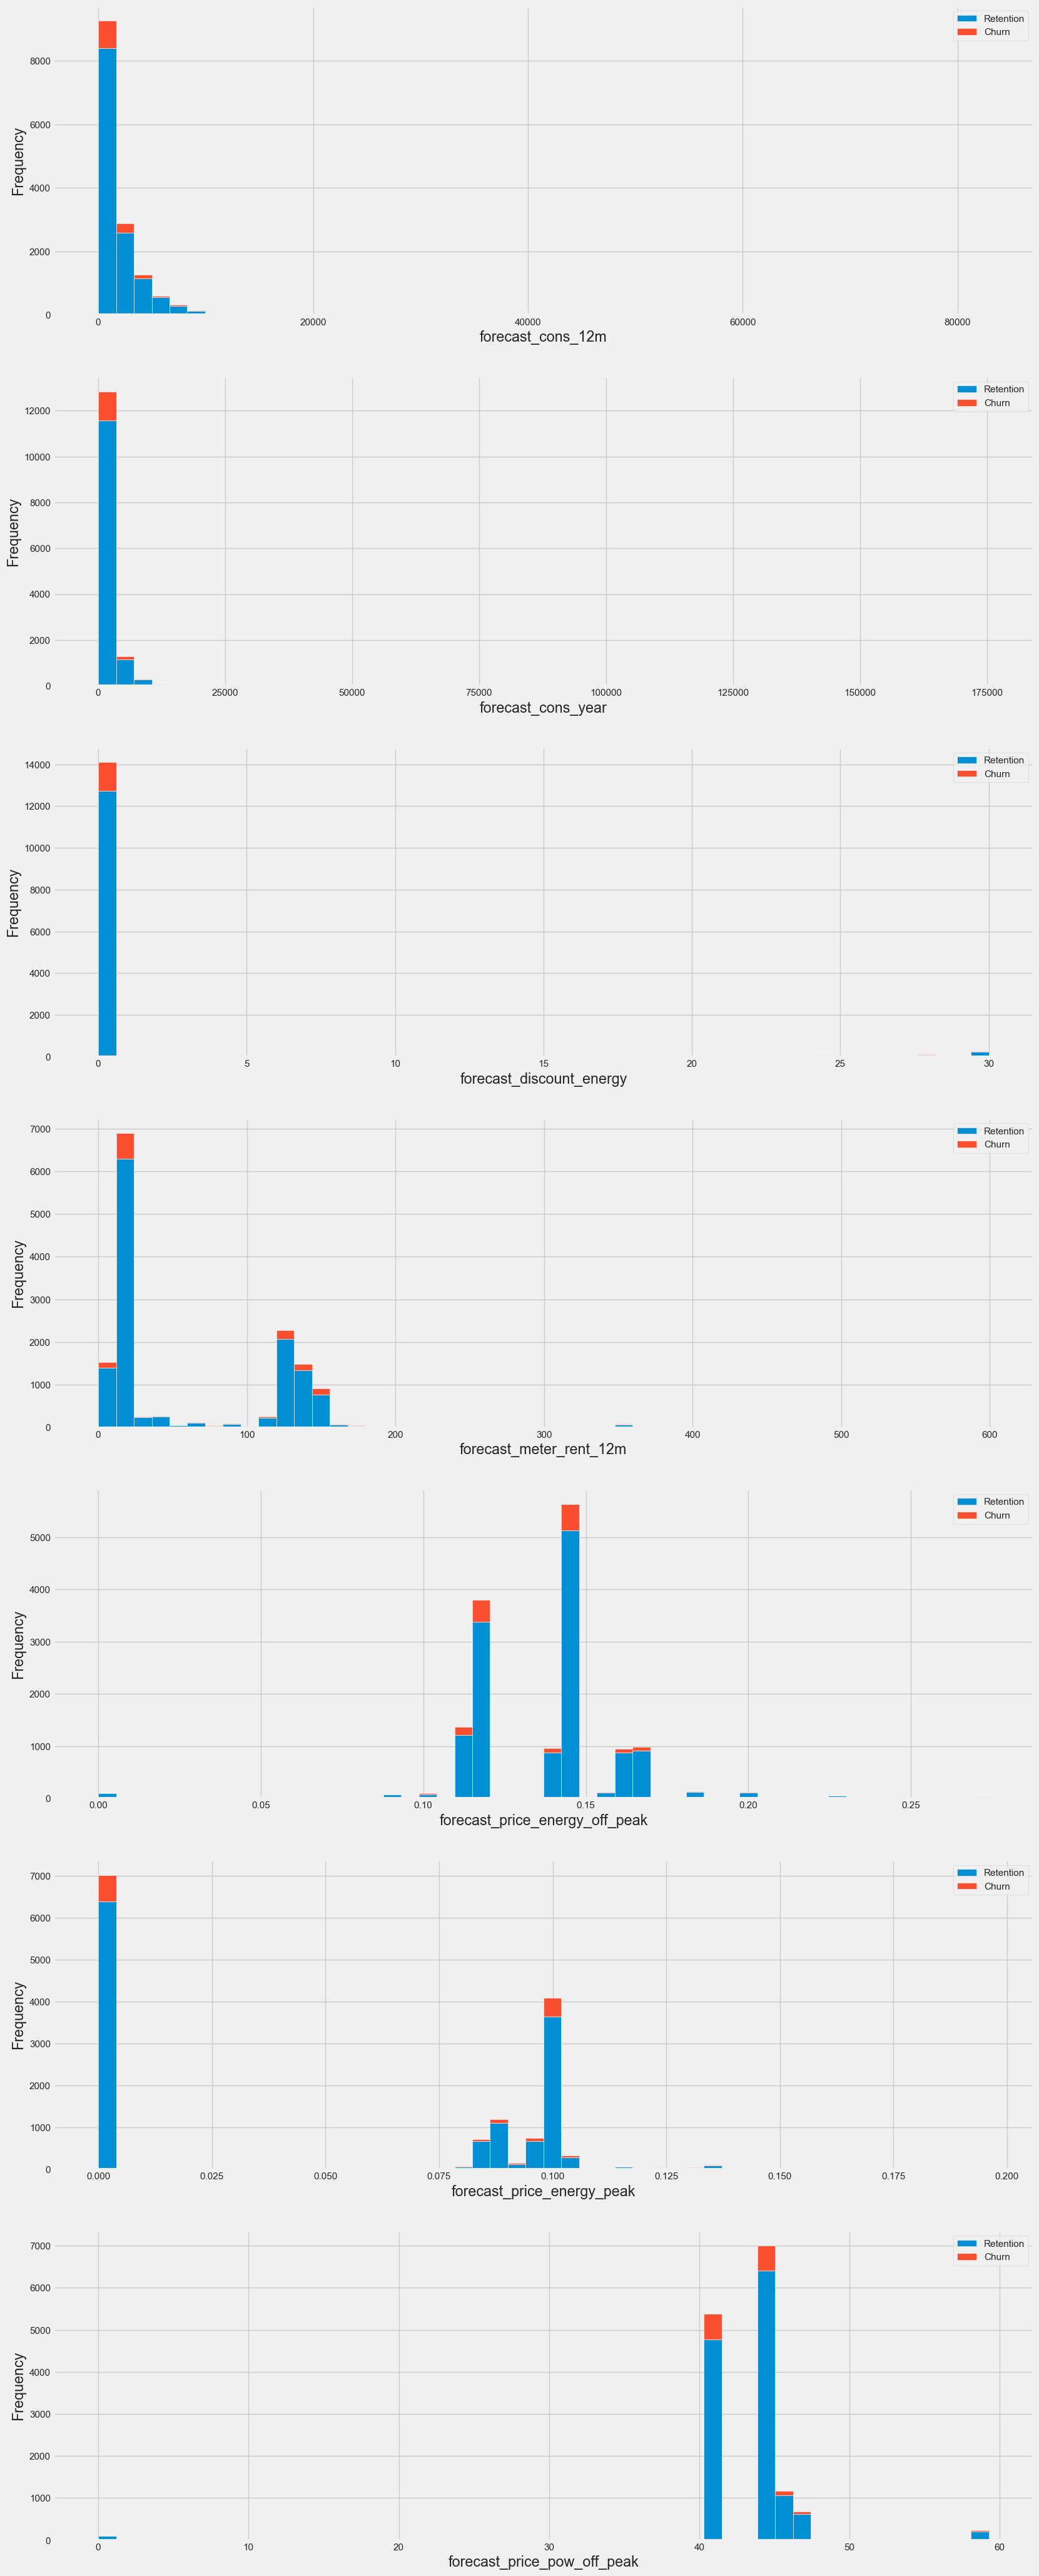

In [35]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

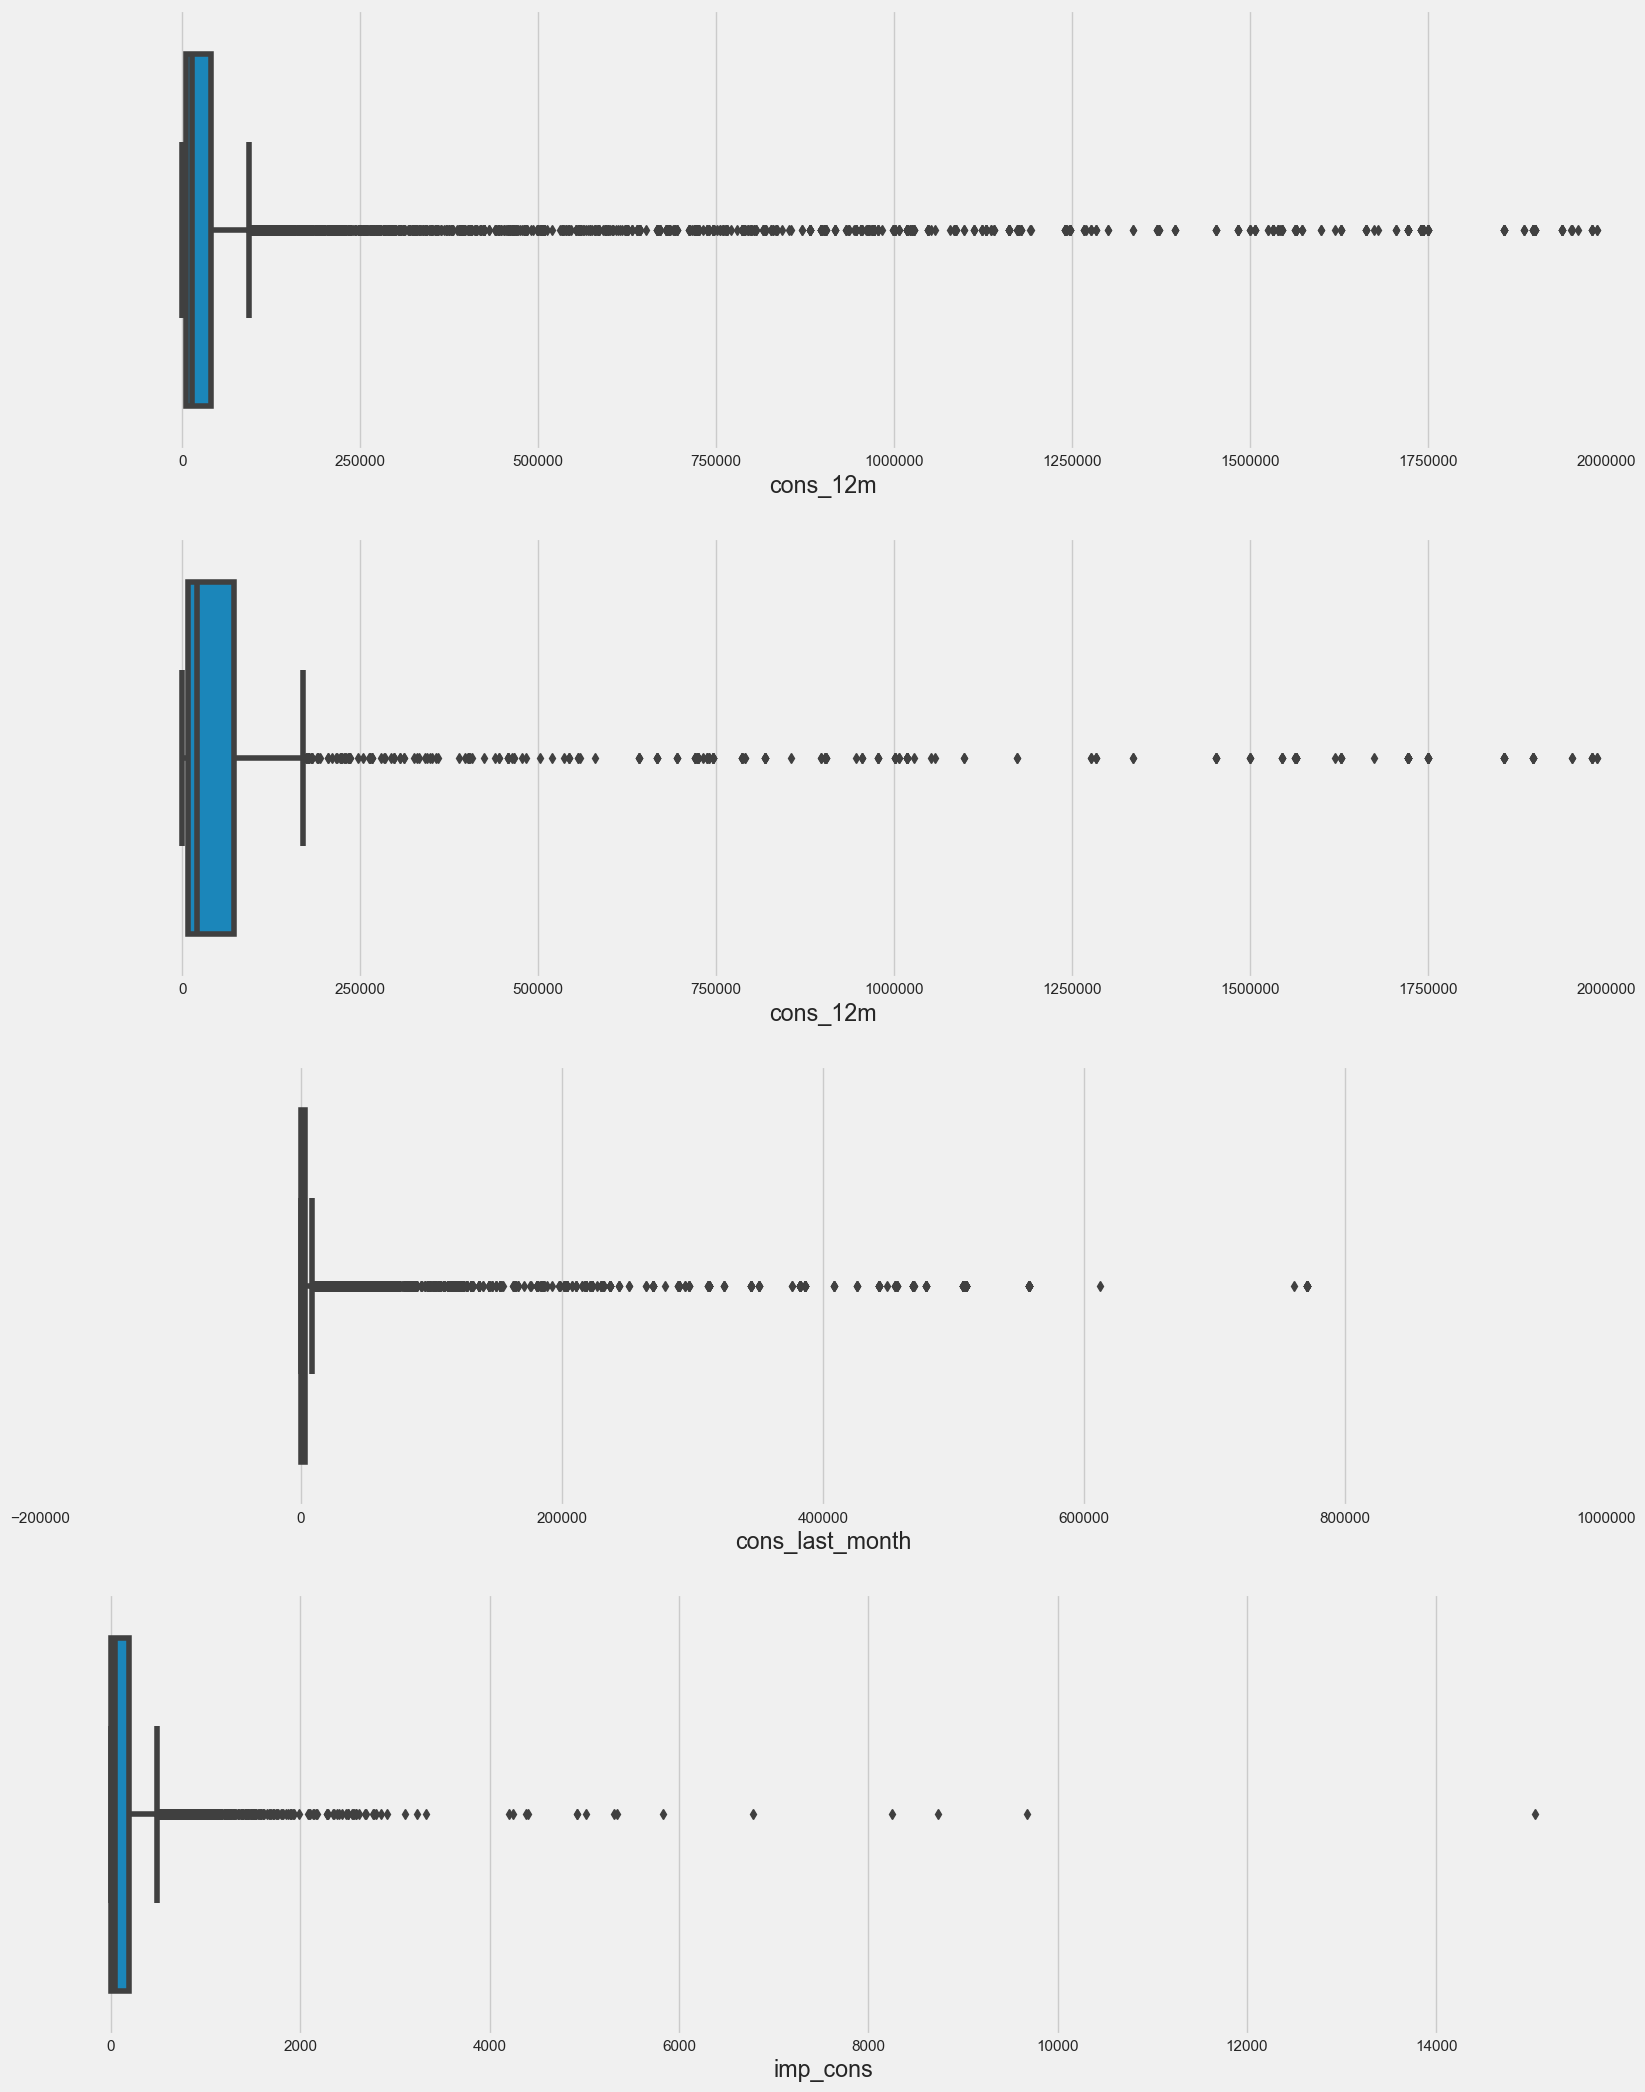

In [36]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
sns.boxplot(consumption['cons_12m'], ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_12m'], ax=axs[1])
sns.boxplot(consumption['cons_last_month'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

for ax in axs :
    ax.ticklabel_format(style='plain', axis='x')

axs[0].set_xlim(-200000,2000000)
axs[1].set_xlim(-200000,2000000)
axs[2].set_xlim(-200000,1000000)
plt.show()

### Margins


In [37]:
margin_churn = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

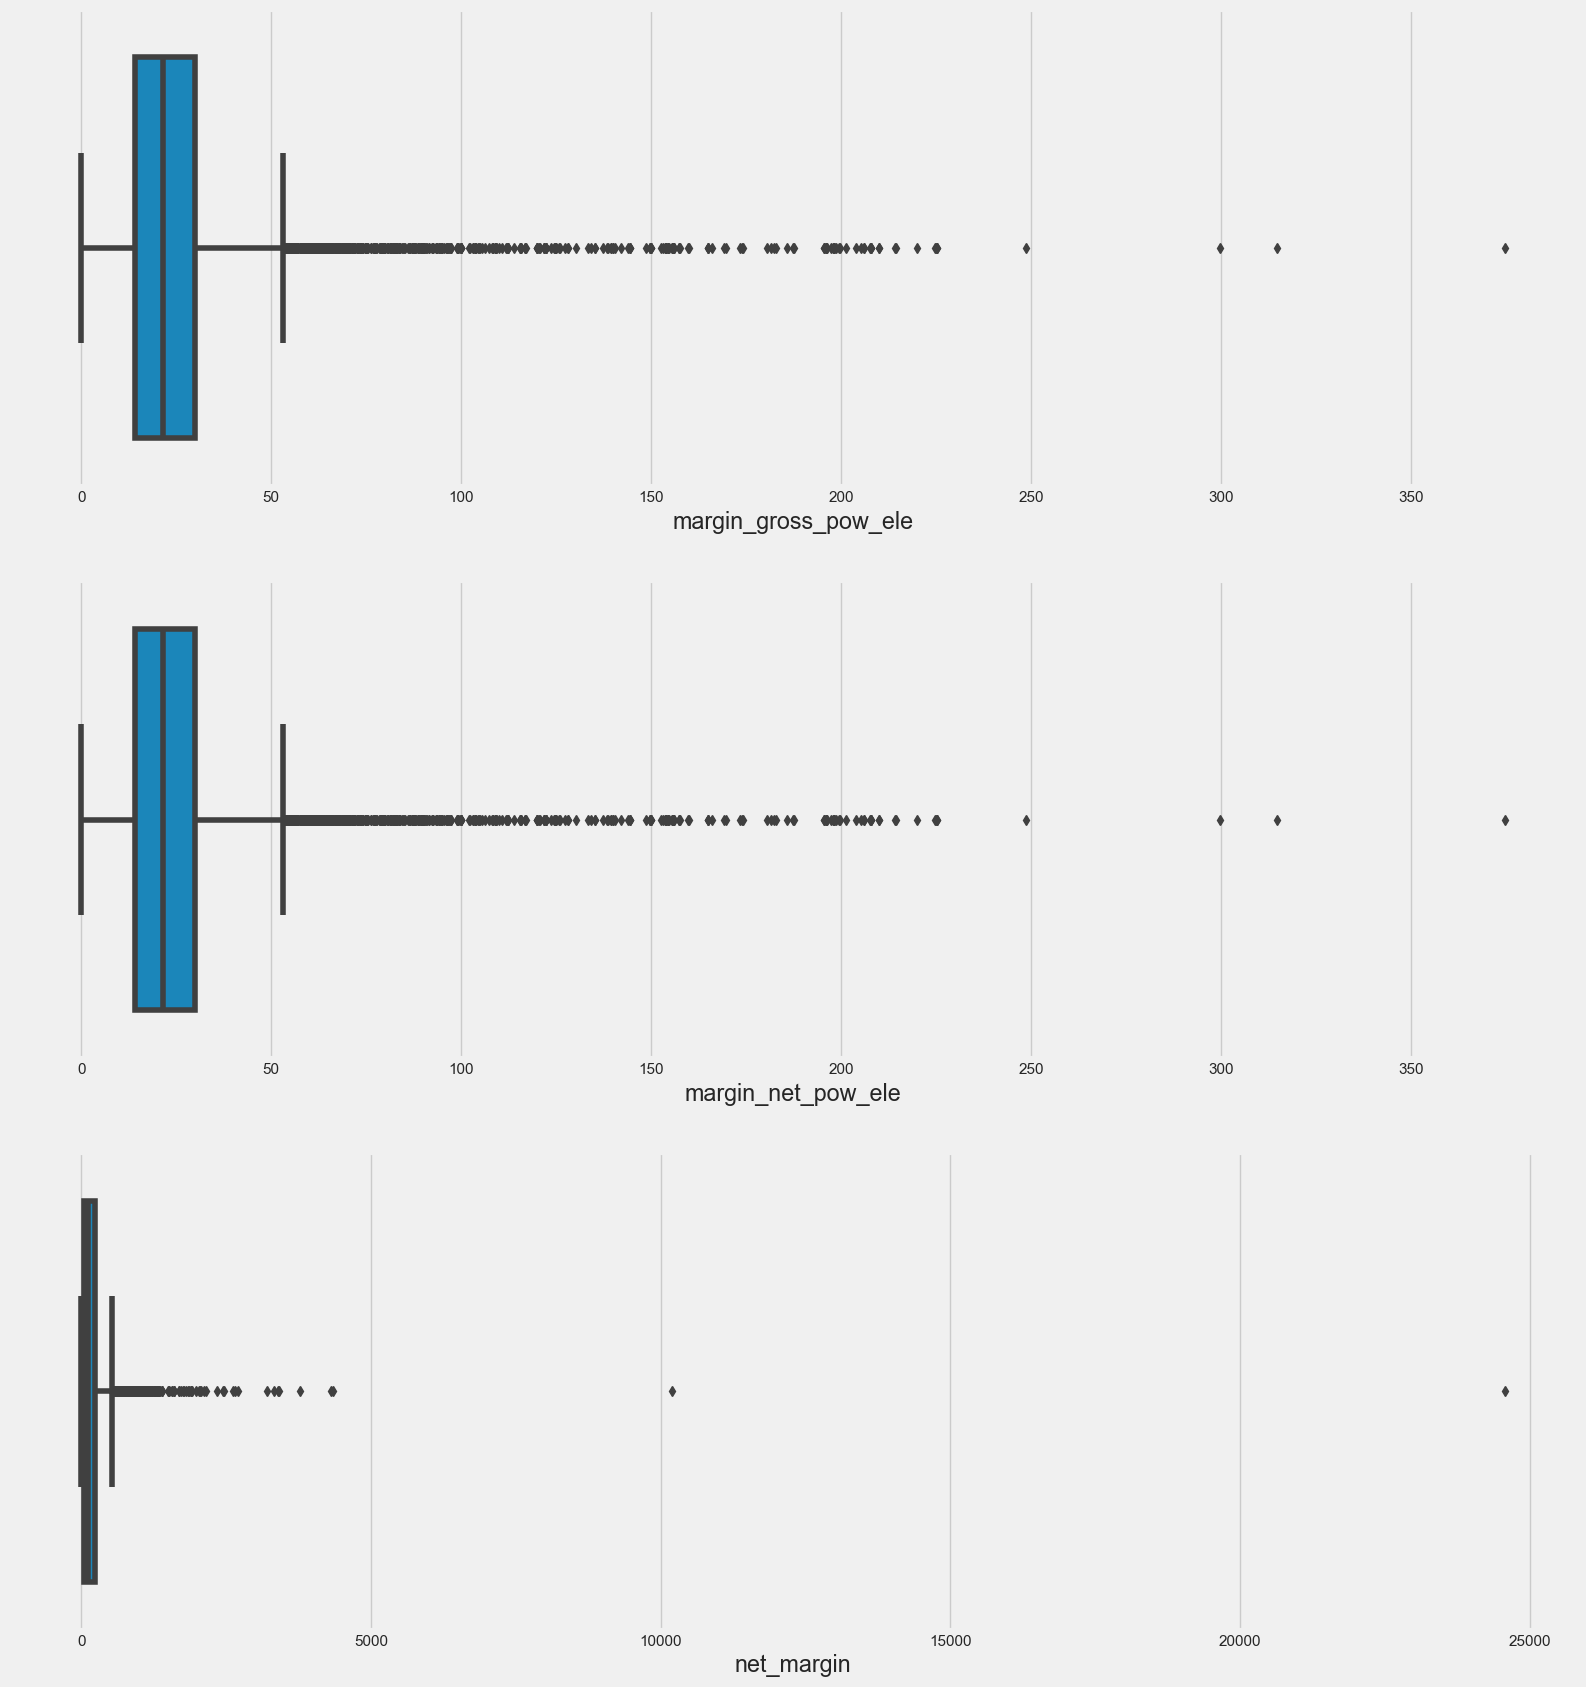

In [38]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
sns.boxplot(margin_churn['margin_gross_pow_ele'] , ax=axs[0])
sns.boxplot(margin_churn['margin_net_pow_ele'] , ax=axs[1])
sns.boxplot(margin_churn['net_margin'] , ax=axs[2])

plt.show()

### Other Columns

In [39]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

Text(0, 0.5, 'Company base(%)')

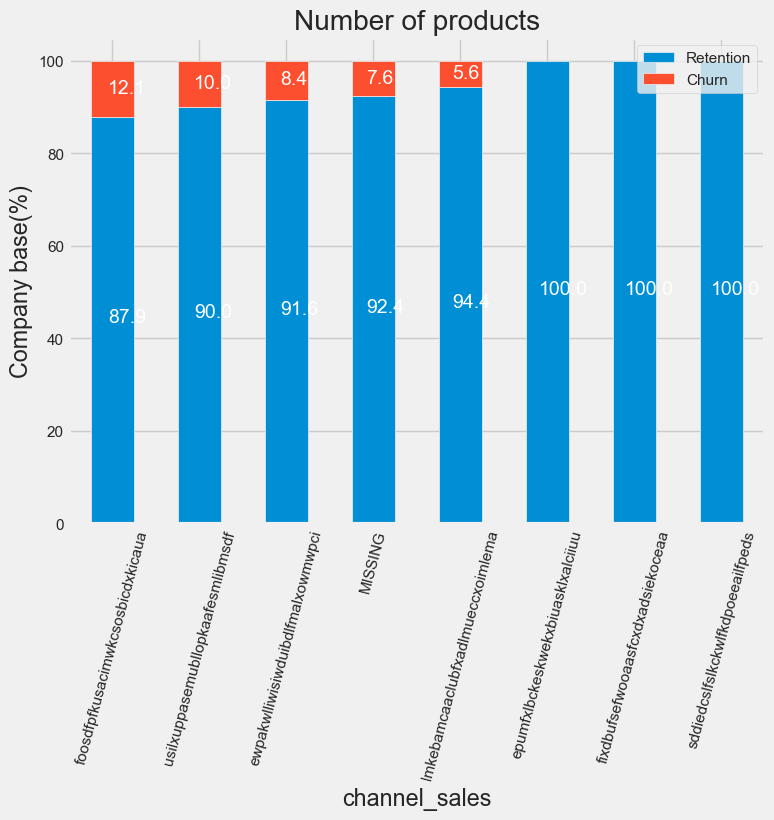

In [40]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number of products')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

In [41]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

Text(0, 0.5, 'Company base(%)')

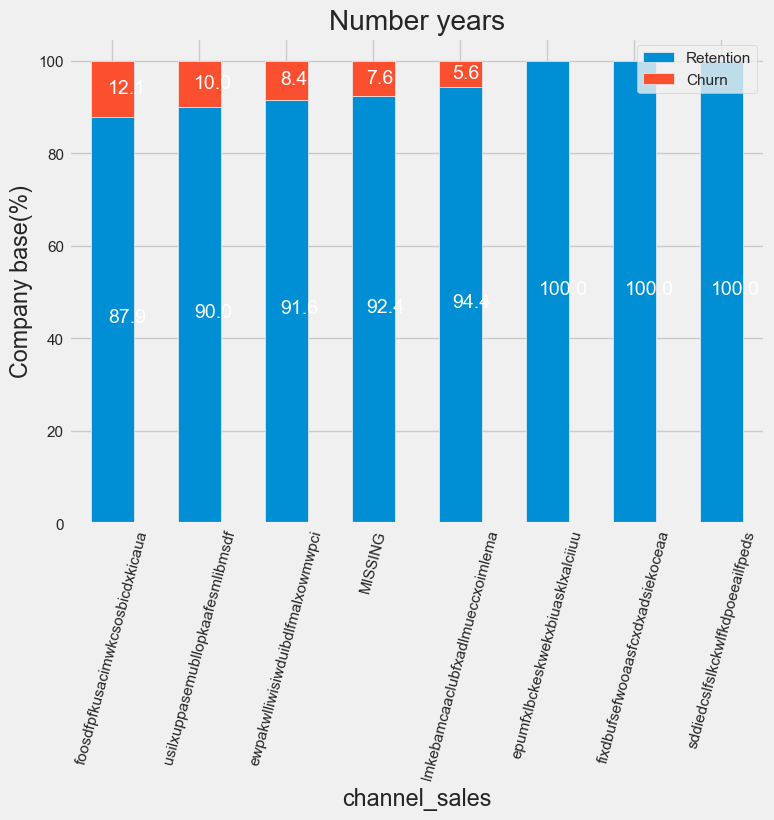

In [42]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number years')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

In [43]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

Text(0, 0.5, 'Company base(%)')

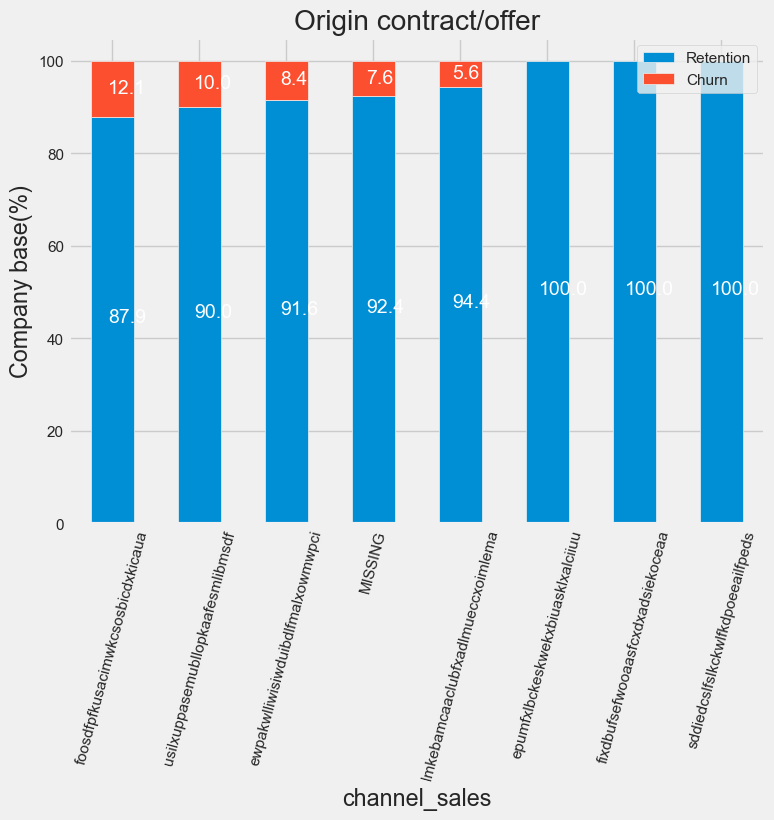

In [44]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

## Dates 

In [45]:
from datetime import datetime

In [46]:
client_df.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,12/9/2011,12/9/2016,11/1/2015,12/10/2015,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,12/2/2011,12/2/2016,12/2/2011,12/3/2015,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,4/21/2010,4/21/2016,4/21/2010,4/22/2015,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,9/23/2011,9/23/2016,9/23/2011,9/25/2015,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,5/4/2010,5/4/2016,4/29/2015,5/5/2015,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [47]:
date = client_df[['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']].copy()

In [48]:
date['date_activ'] = pd.to_datetime(date['date_activ'] , format='%m/%d/%Y')
date['date_end'] = pd.to_datetime(date['date_end'] ,  format='%m/%d/%Y')
date['date_modif_prod'] = pd.to_datetime(date['date_modif_prod'] ,  format='%m/%d/%Y')
date['date_renewal'] = pd.to_datetime(date['date_renewal'] ,  format='%m/%d/%Y')

In [49]:
# Function to plot monthly churn and retention distribution

def plot_dates(df, col , fontsize_=12) :
    
    date_df = df[[col, 'churn', 'id']].set_index(col).groupby([pd.Grouper(freq='M'), 'churn']).count().unstack(level=1)
    
    ax = date_df.plot(kind='bar', stacked=True, figsize=(18,10), rot=0)
    ax.set_xticklabels(map(lambda x: line_format(x), date_df.index))
    plt.xticks(fontsize = fontsize_)
    plt.ylabel('Num of Companies')
    plt.legend(['Retention', 'Churn'], loc='upper right')
    plt.show()

In [50]:
# Function to convert time label to the format of pandas line plot

def line_format(label):
    
    month = label.month_name()[:1]
    if label.month_name()=='January':
        month+=f'\n{label.year}'
    return month

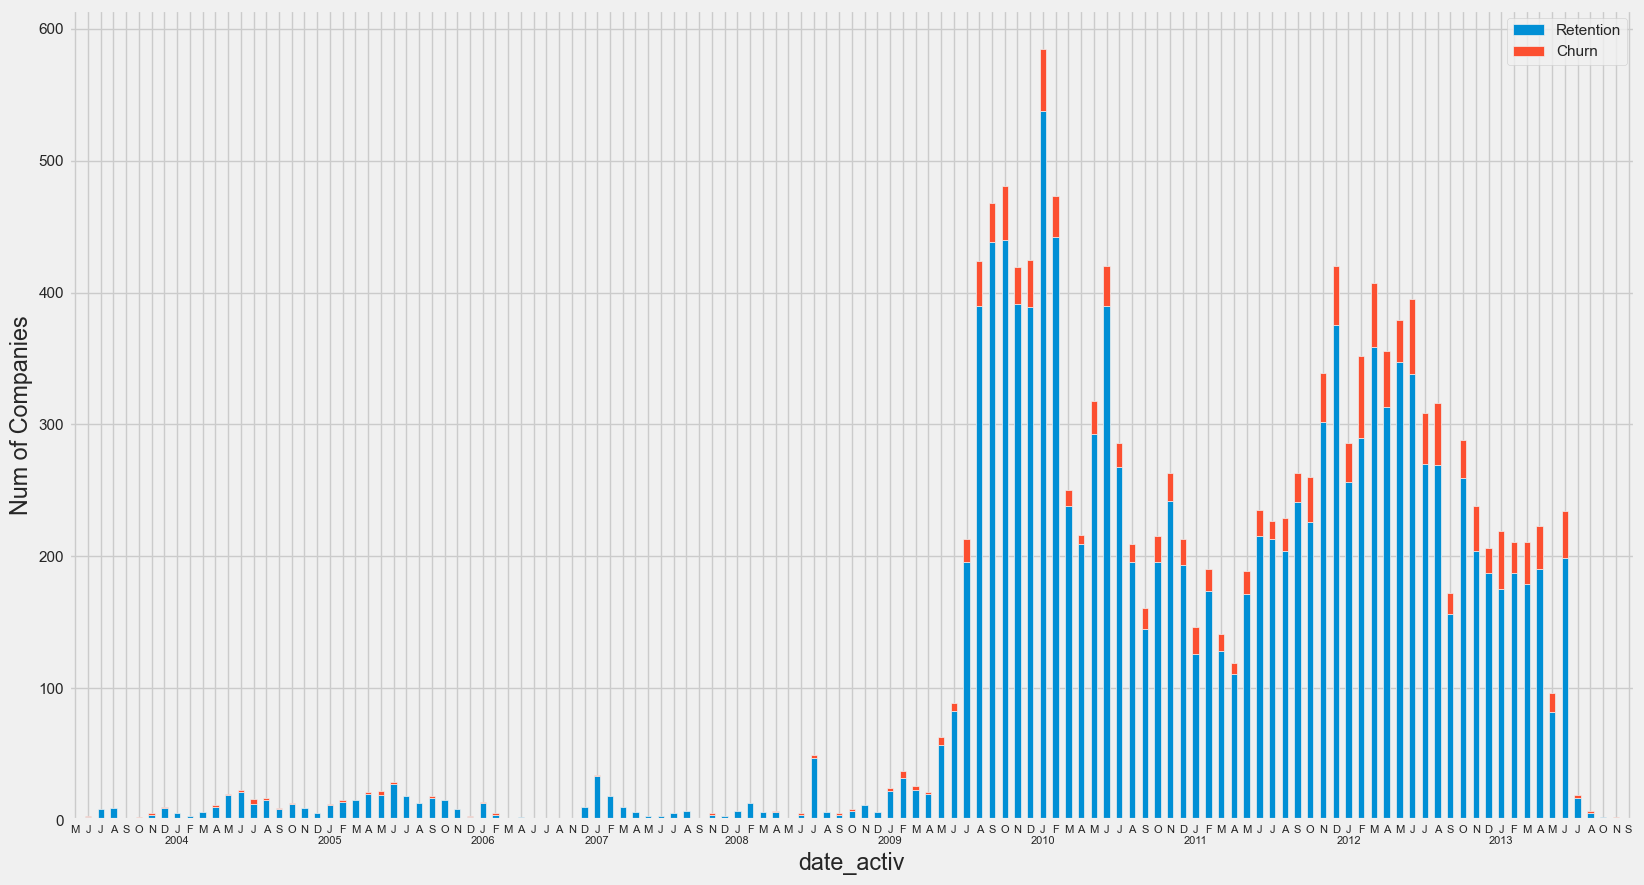

In [51]:
plot_dates(date, 'date_activ', fontsize_=8)

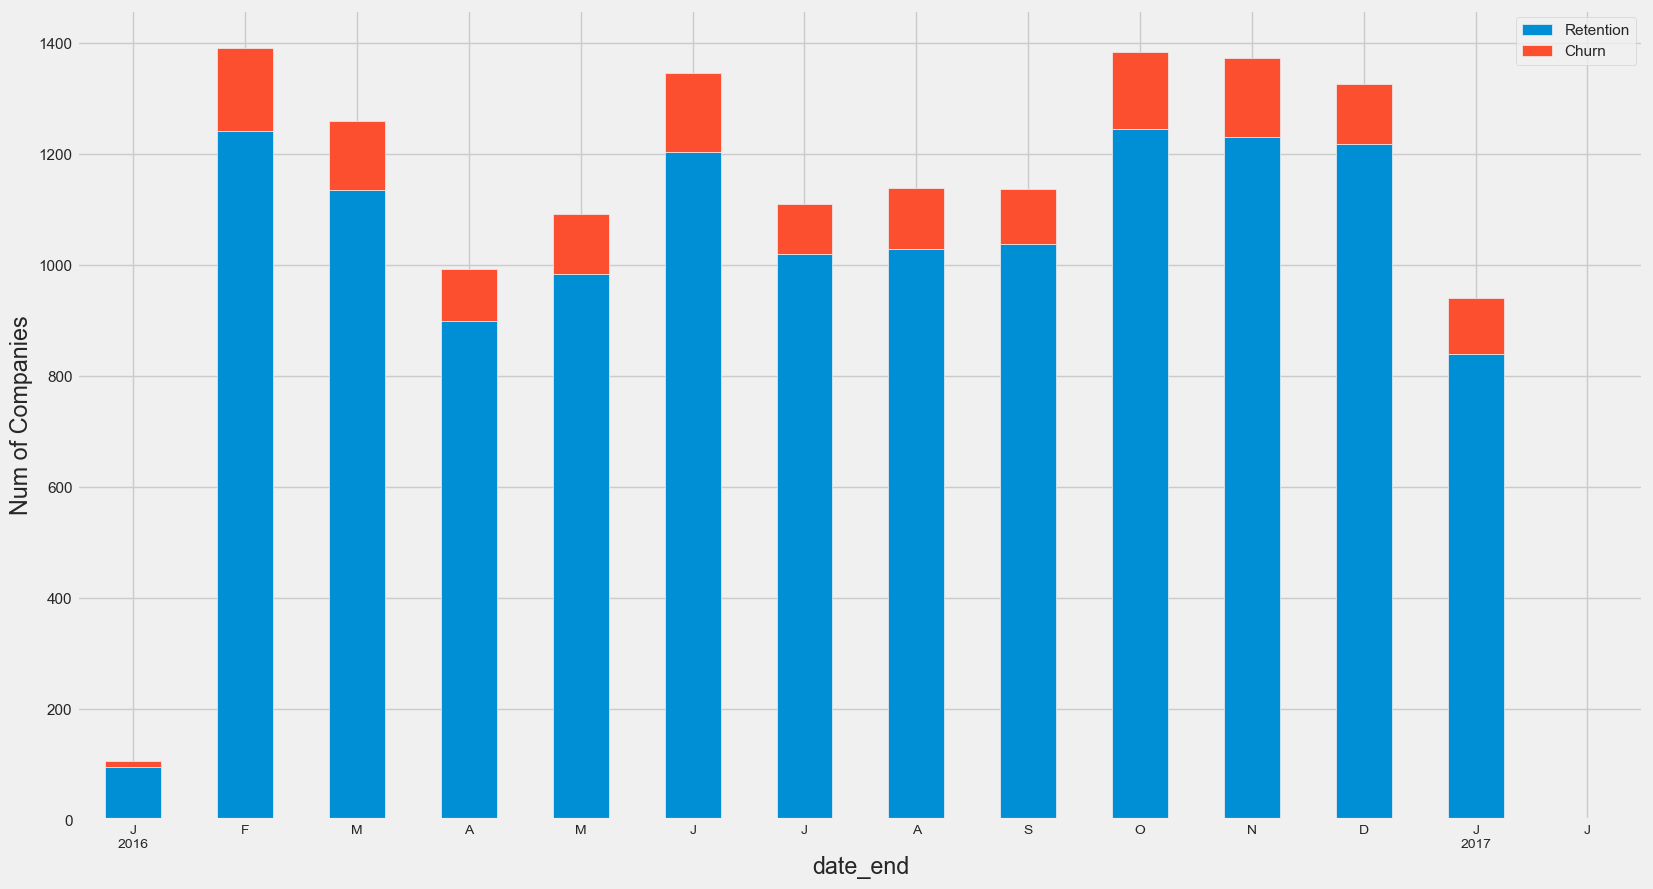

In [52]:
plot_dates(date, 'date_end', fontsize_=10)

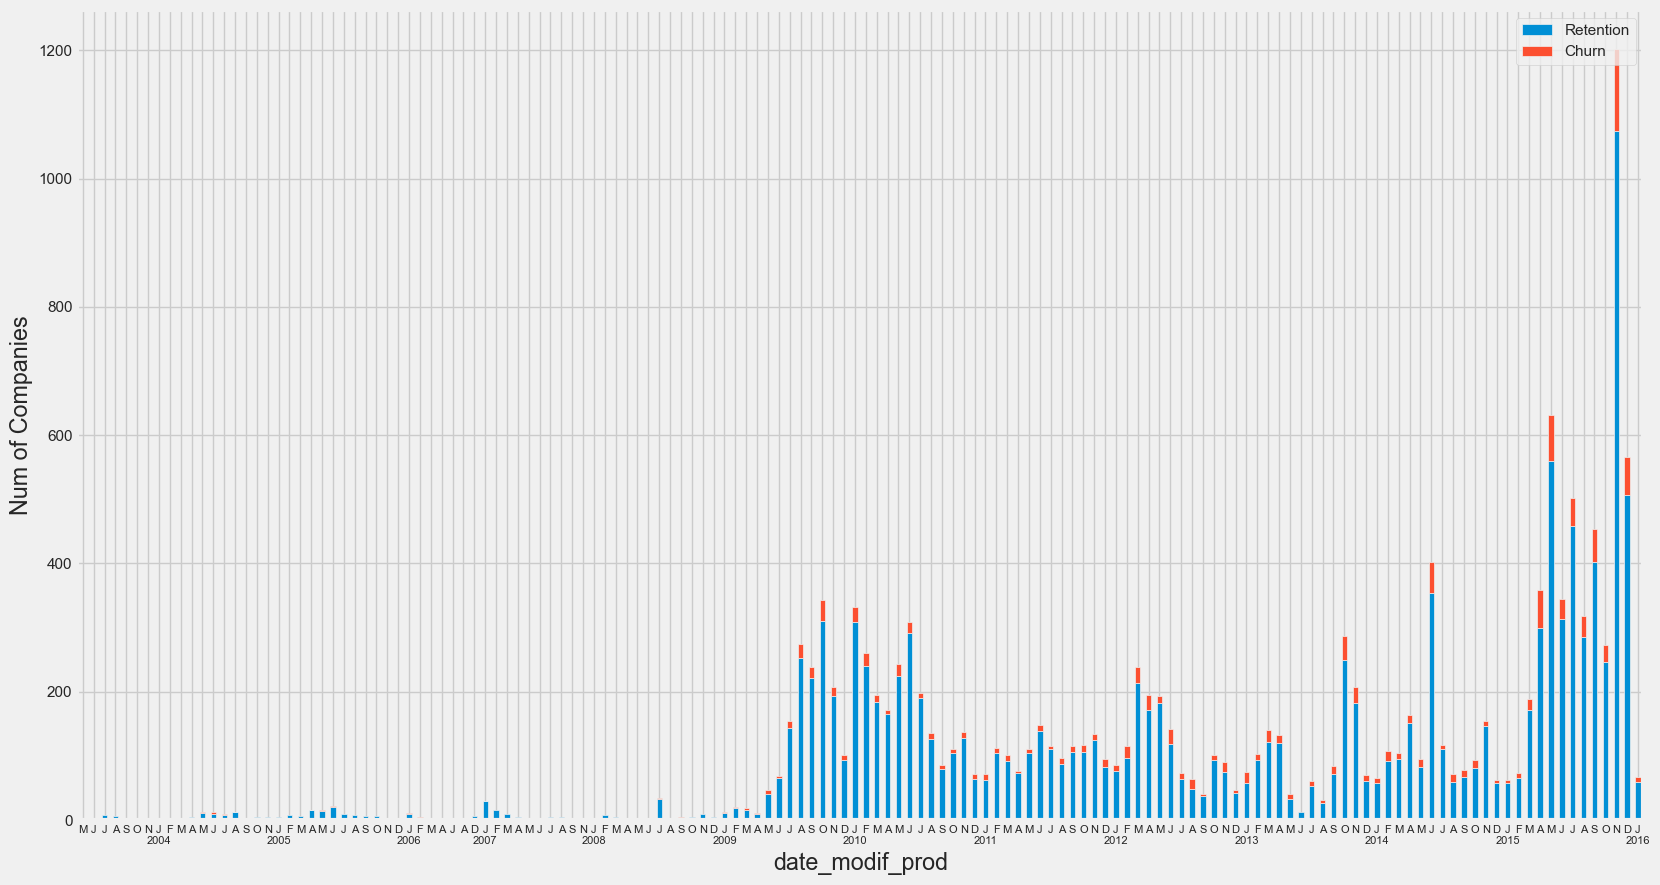

In [53]:
plot_dates(date, 'date_modif_prod', fontsize_=8)

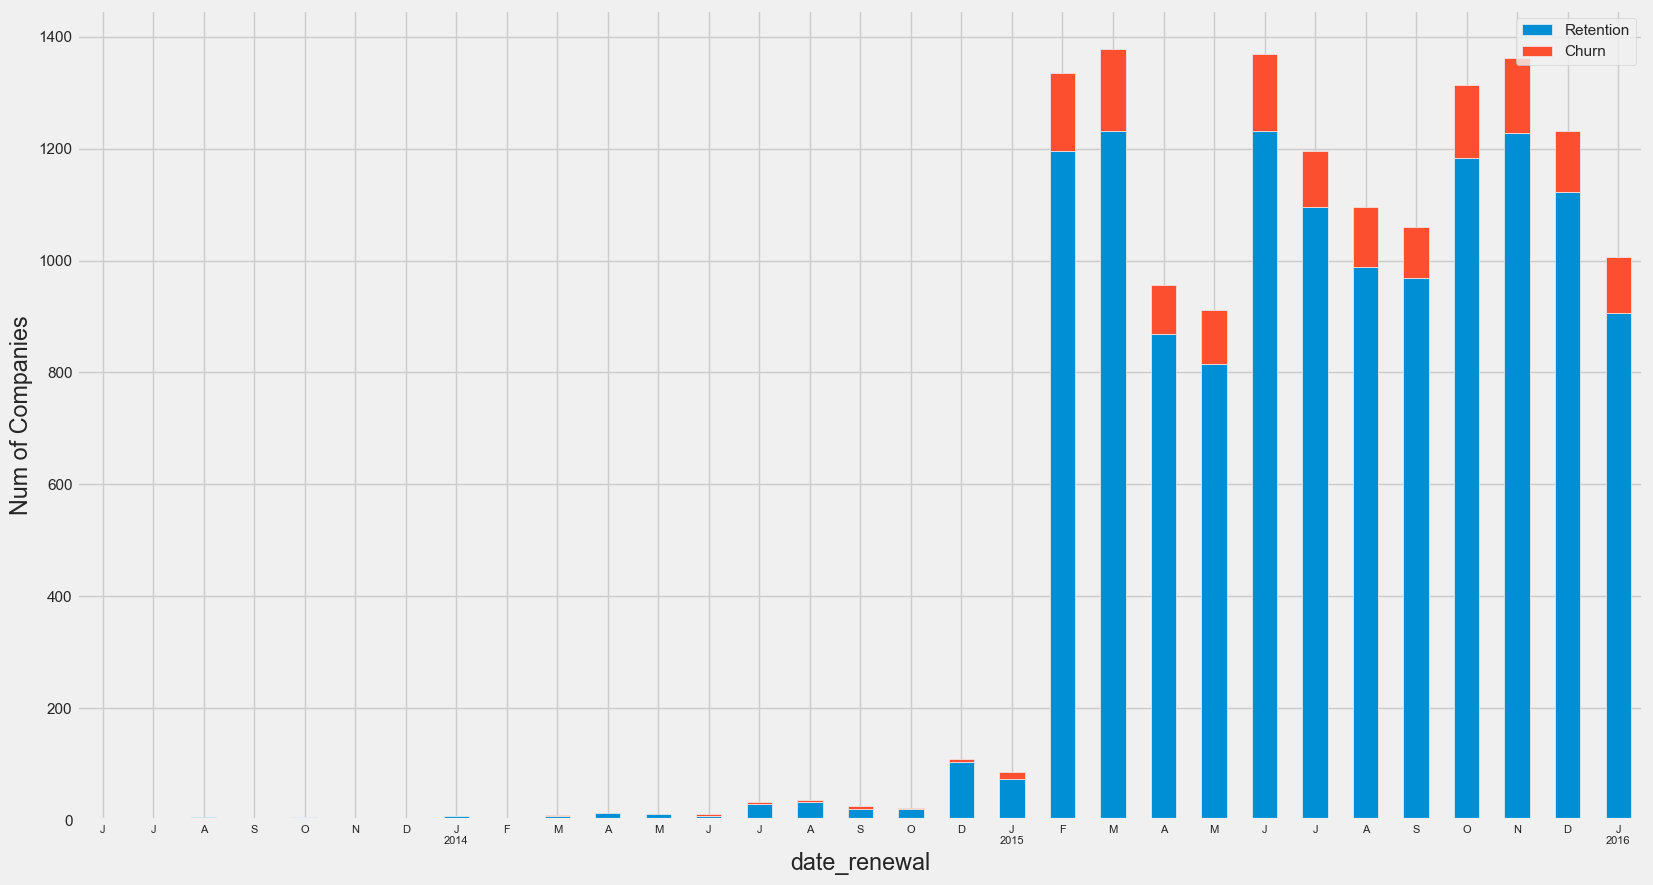

In [54]:
plot_dates(date, 'date_renewal', fontsize_=8)

## Contract type (electricity, gas)

In [55]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


Text(0.5, 1.0, 'Contract Type')

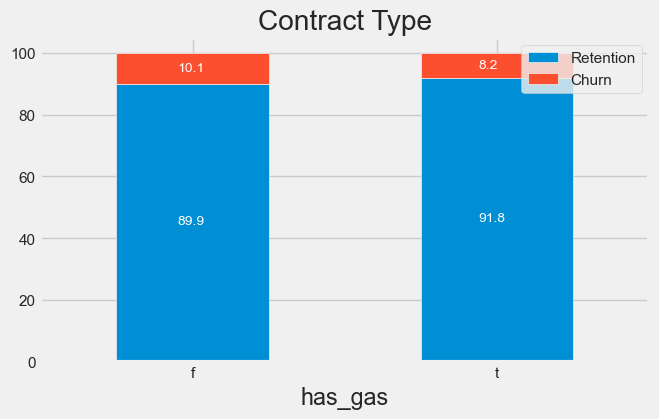

In [56]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(7,4),rot=0)
annotate_stacked_bars(ax, textsize=10)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

# Hypothesis Investigation 

#### Next, we'll assess customer price sensitivity. If a price hike prompts customer departures, it indicates price sensitivity as increased prices drive churn. If prices remain stable or decrease and customers still leave, attributing it to price sensitivity becomes challenging.

In [57]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [58]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [59]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [60]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [61]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [62]:

#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [63]:

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [64]:
price_features.head()

,id,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,...,mean_6m_price_med_peak,mean_year_price_off_peak_var_y,mean_year_price_peak_var_y,mean_year_price_mid_peak_var_y,mean_year_price_off_peak_fix_y,mean_year_price_peak_fix_y,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365313,0.125735,0.104651,0.073758,40.728885,24.437330,16.291555,40.854620,24.541981,16.365313
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.147028,0.000000,0.000000,44.393916,0.000000,0.000000,44.540944,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.181884,0.000000,0.000000,45.301853,0.000000,0.000000,45.483737,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.323297,0.119958,0.098906,0.068981,40.635791,24.381473,16.254316,40.755749,24.480379,16.323297
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.148560,0.000000,0.000000,44.266930,0.000000,0.000000,44.415491,0.000000,0.000000


Now we need to merge the priice df with churn variable to check whether price sensitivity of customers has any relation with churn.

In [65]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()
     

,id,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,...,mean_year_price_off_peak_var_y,mean_year_price_peak_var_y,mean_year_price_mid_peak_var_y,mean_year_price_off_peak_fix_y,mean_year_price_peak_fix_y,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.125735,0.104651,0.073758,40.728885,24.43733,16.291555,40.854620,24.541981,16.365313,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.147028,0.000000,0.000000,44.393916,0.00000,0.000000,44.540944,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.181884,0.000000,0.000000,45.301853,0.00000,0.000000,45.483737,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.148560,0.000000,0.000000,44.266930,0.00000,0.000000,44.415491,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.127476,0.106391,0.075499,40.728885,24.43733,16.291555,40.856361,24.543721,16.367054,0


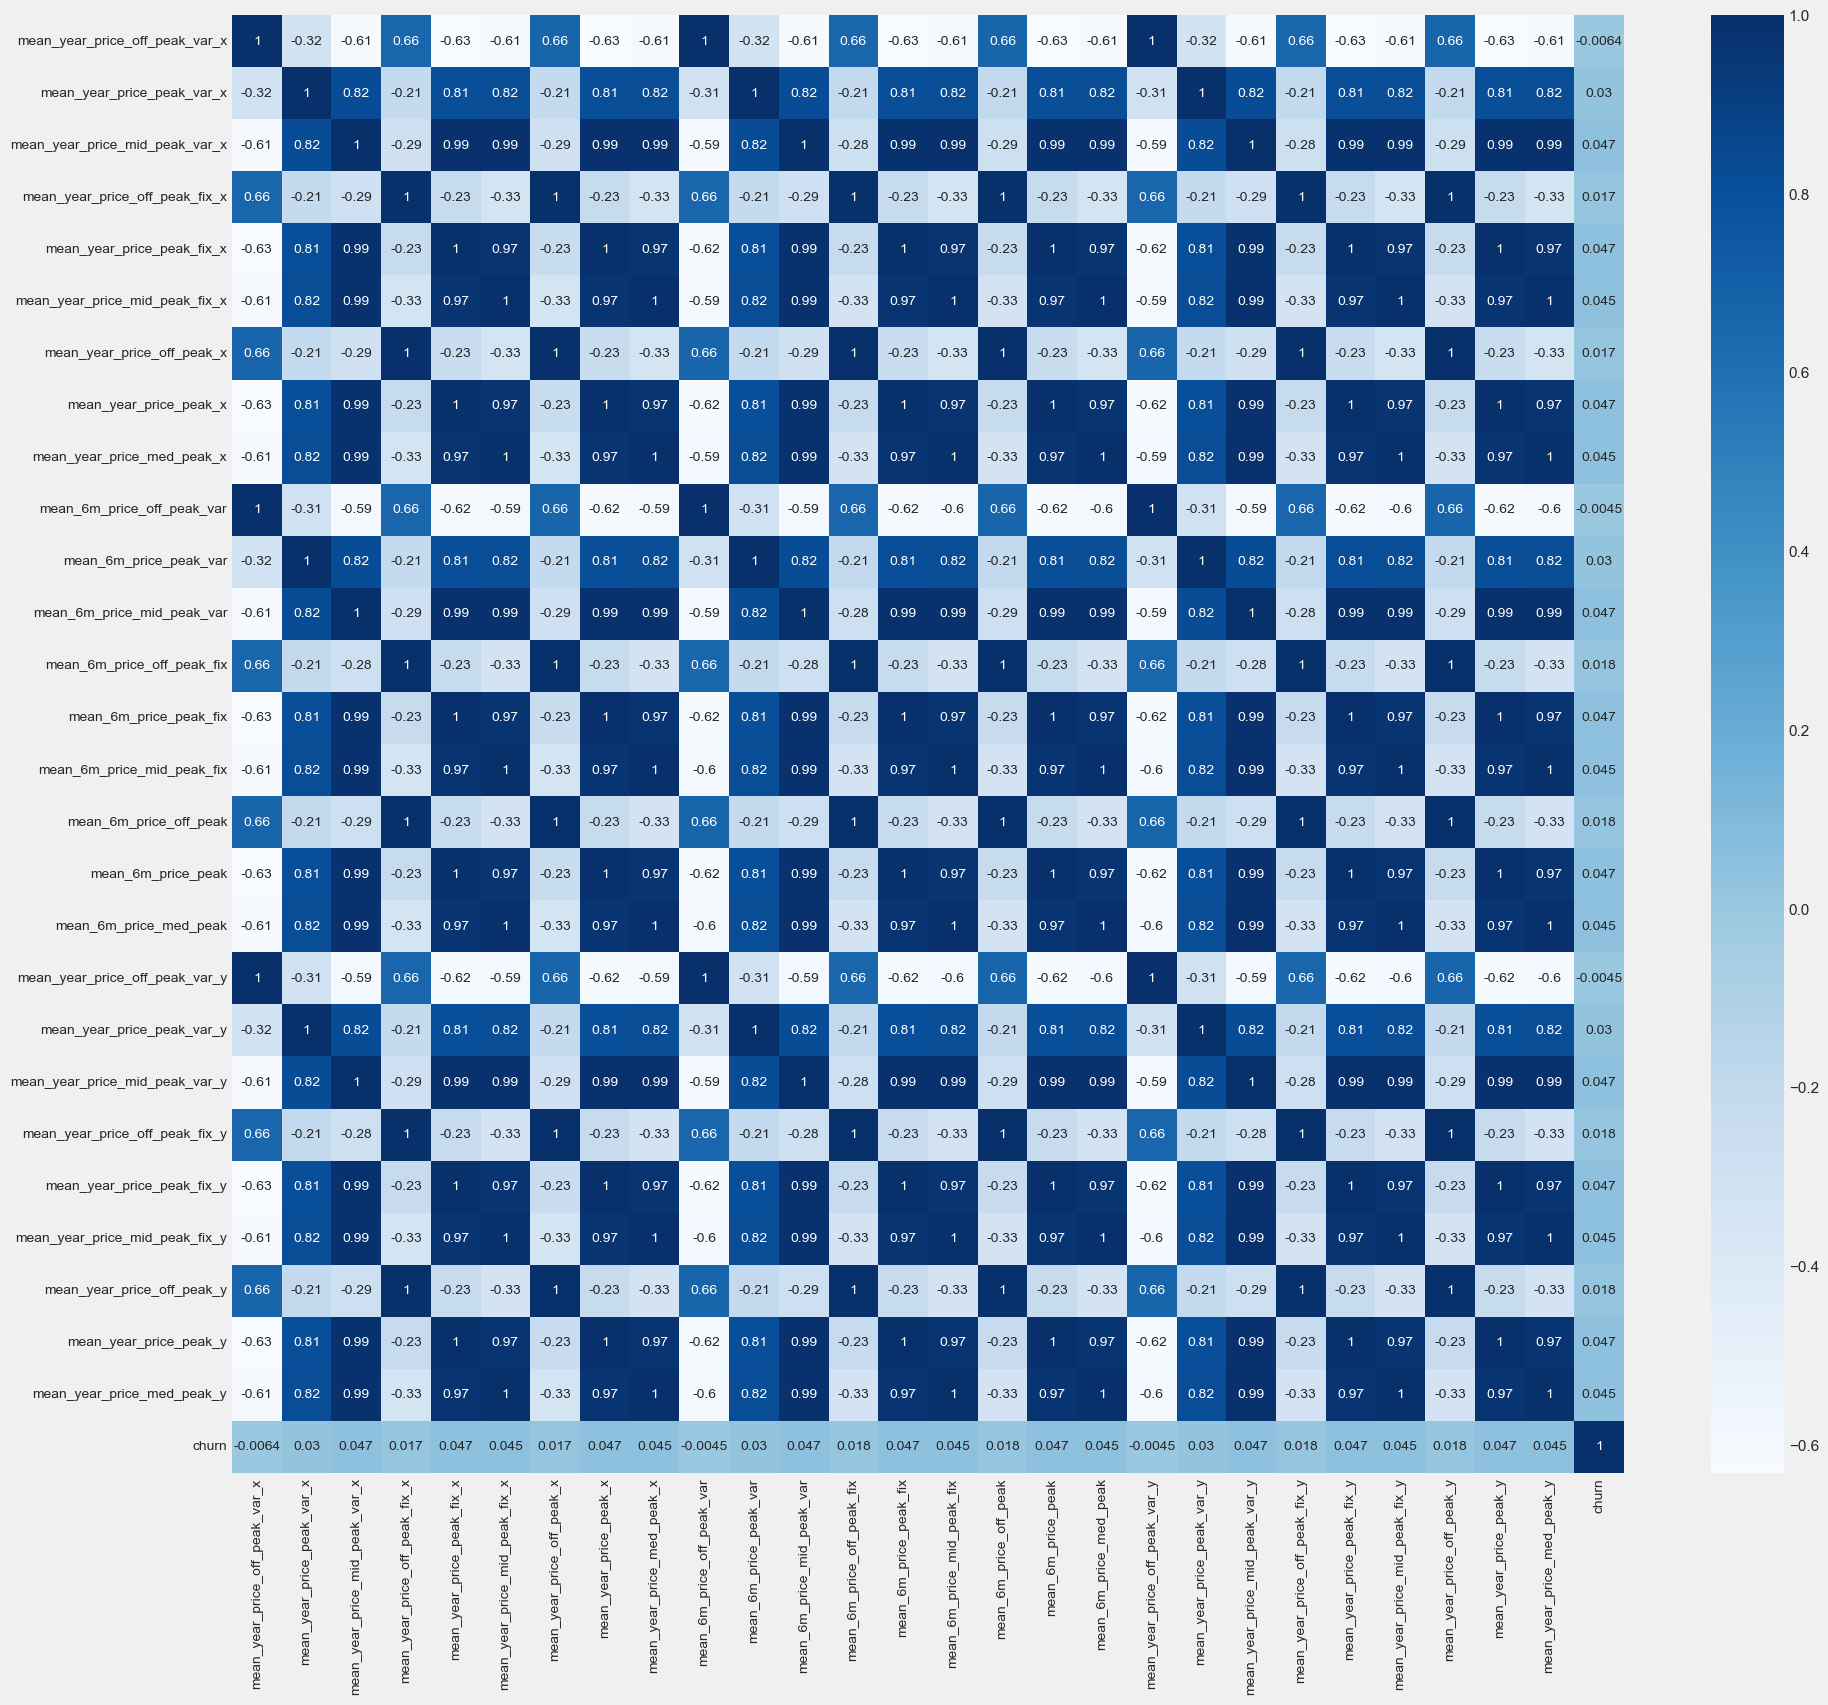

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation
corr = price_churn.corr()

# Set the figure size
plt.figure(figsize=(20, 18))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={'size': 10})

# Adjust the font size of axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


The preceding plot illustrates the correlations among price variables and their relationship with churn. Notably, the correlation between churn and price variables is quite low, indicating that customer churn is not significantly influenced by price changes.

In the next step, we will combine client data with the price-churn dataset for modeling purposes.

In [67]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')
     

churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var_y,mean_year_price_peak_var_y,mean_year_price_mid_peak_var_y,mean_year_price_off_peak_fix_y,mean_year_price_peak_fix_y,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,0.123500,0.102447,0.072522,40.635792,24.381472,16.254314,40.759293,24.483919,16.326836,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,0.149968,0.012212,0.000000,44.266930,0.000000,0.000000,44.416898,0.012212,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,0.171116,0.088581,0.000000,44.393916,0.000000,0.000000,44.565032,0.088581,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,0.151785,0.000000,0.000000,44.419313,0.000000,0.000000,44.571098,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,...,0.125454,0.104384,0.073252,40.705611,24.423366,16.282245,40.831065,24.527750,16.355497,0


In [68]:
churn_data.to_csv('churn_data_modeling.csv')

### Formatting Data

#### Missing dates

There could be several ways in which we could deal with the missing dates.
One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prod but one year ahead. The simplest way, we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median() can be used, but this will not work for dates or strings, so we will use a workaround using .valuecounts()

In [69]:
churn_data.loc[churn_data['date_modif_prod'].isnull(), 'date_modif_prod'] = churn_data['date_modif_prod'].value_counts().index[0]
churn_data.loc[churn_data['date_end'].isnull(), 'date_end'] = churn_data['date_end'].value_counts().index[0]
churn_data.loc[churn_data['date_renewal'].isnull(), 'date_renewal'] = churn_data['date_renewal'].value_counts().index[0]

We might have some prices missing for some companies and months

In [70]:
(price_df.isnull().mean()*100)

id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64

In [71]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [72]:
price_df.loc[price_df['price_off_peak_var'].isnull(), 'price_off_peak_var']=price_df['price_off_peak_var'].median()
price_df.loc[price_df['price_peak_var'].isnull(), 'price_peak_var']=price_df['price_peak_var'].median()
price_df.loc[price_df['price_mid_peak_var'].isnull(), 'price_mid_peak_var']=price_df['price_mid_peak_var'].median()
price_df.loc[price_df['price_off_peak_fix'].isnull(), 'price_off_peak_fix']=price_df['price_off_peak_fix'].median()
price_df.loc[price_df['price_peak_fix'].isnull(), 'price_peak_fix']=price_df['price_peak_fix'].median()
price_df.loc[price_df['price_mid_peak_fix'].isnull(), 'price_mid_peak_fix']=price_df['price_mid_peak_fix'].median()

In order to use the dates in our churn prediction model we are going to change the representation of these dates. Instead of using the date itself, wewill be transforming it in number of months. In order to make this transformation we need to change the dates to datetime and create a reference date which will be January 2016

Formatting dates - customer churn data and price history data

In [73]:
churn_data['date_activ'] = pd.to_datetime(churn_data['date_activ'] , format='%m/%d/%Y')
churn_data['date_end'] = pd.to_datetime(churn_data['date_end'] , format='%m/%d/%Y')
churn_data['date_modif_prod'] = pd.to_datetime(churn_data['date_modif_prod'] ,format='%m/%d/%Y')
churn_data['date_renewal'] = pd.to_datetime(churn_data['date_renewal'] , format='%m/%d/%Y')

In [74]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%m/%d/%Y')

In [75]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix . Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather thana "price discount". We will replace the negative values with the median (most frequent value)

## Feature Engineering 

We create a new feature, tenure = date_end - date_activ

In [76]:
churn_data['tenure'] = ((churn_data['date_end'] - churn_data['date_activ'])/np.timedelta64(1, "Y")).astype(int)

In [77]:
tenure = churn_data[['tenure', 'churn' , 'id']].groupby(['tenure', 'churn'])['id'].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1) , axis=0)*100)

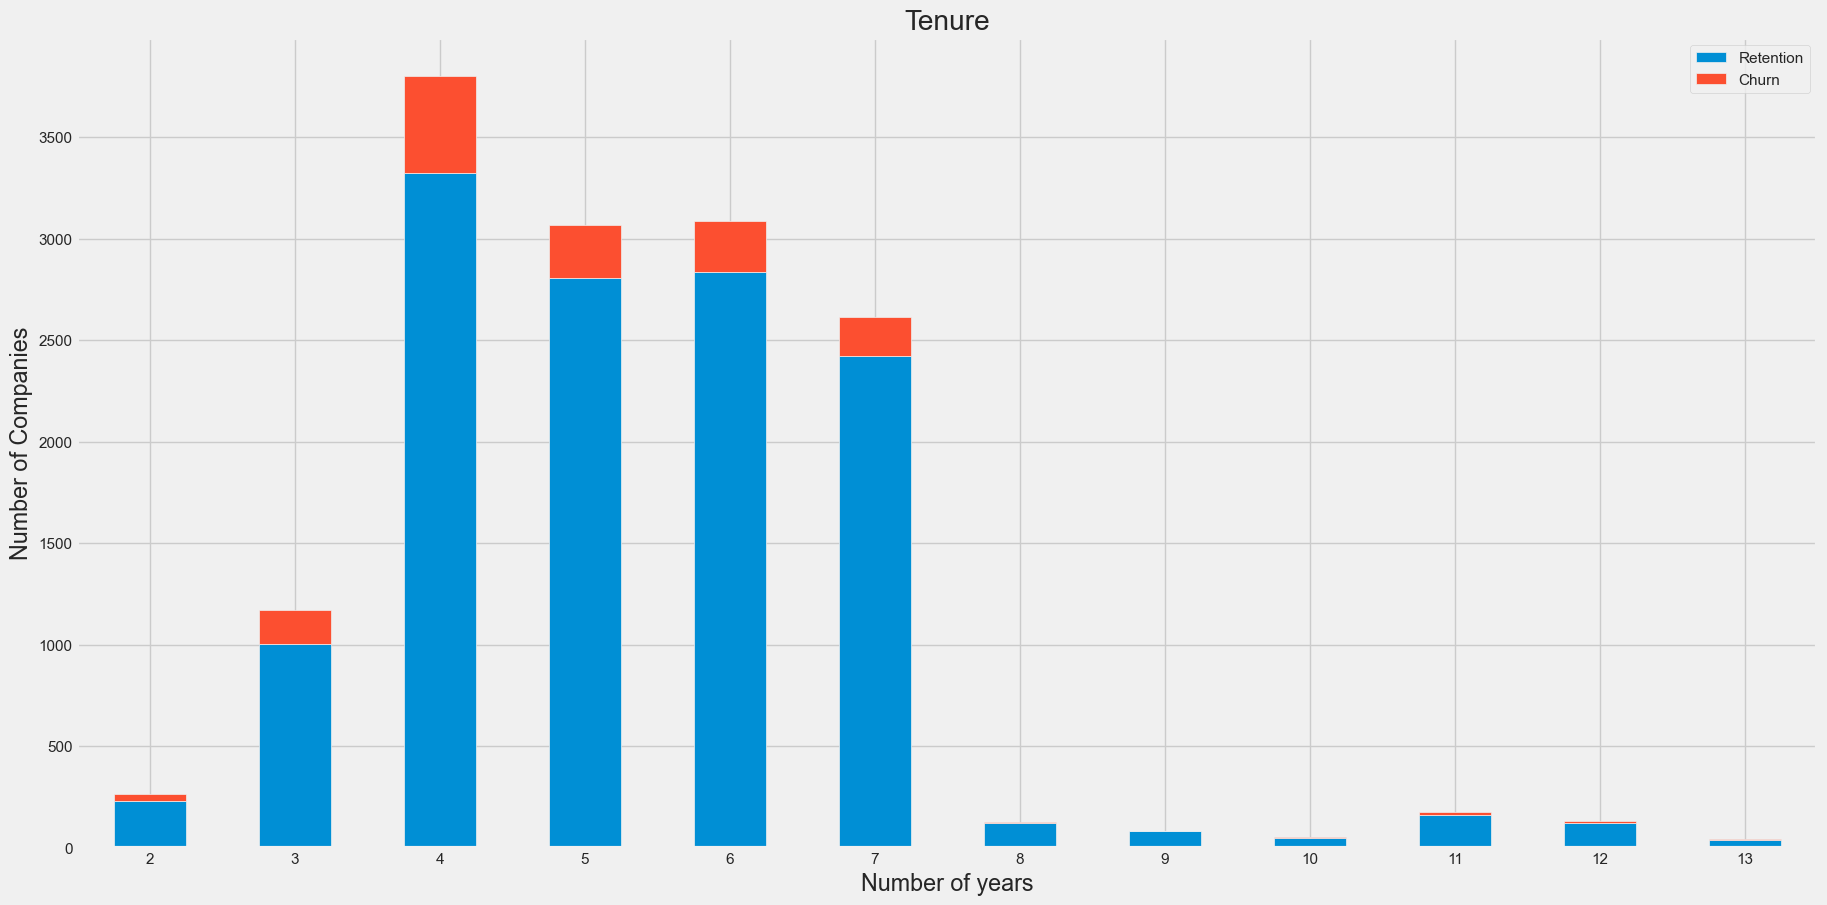

In [78]:
tenure.plot(kind = 'bar' , figsize=(20,10) , stacked=True, rot=0, title='Tenure')

plt.legend(['Retention', 'Churn'], loc='upper right')
plt.ylabel('Number of Companies')
plt.xlabel('Number of years')
plt.show()

The churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure.

Need to transform the date columns to gain more insights.
months_activ : Number of months active until reference date (Jan 2016)
months_to_end : Number of months of the contract left at reference date (Jan 2016)
months_modif_prod : Number of months since last modification at reference date (Jan 2016)
months_renewal : Number of months since last renewal at reference date (Jan 2016)

In [79]:
def get_months(ref_date, df , col):
    
    time_diff = ref_date-df[col]
    months = (time_diff / np.timedelta64(1, "M")).astype(int)
    
    return months

In [80]:
from datetime import datetime  # Import the 'datetime' class from the 'datetime' module

ref_date = datetime(2016, 1, 1)  # Create a datetime object


In [81]:
churn_data['months_activ'] = get_months(ref_date, churn_data , 'date_activ')
churn_data['months_end'] = -get_months(ref_date, churn_data , 'date_end')
churn_data['months_modif_prod'] = get_months(ref_date, churn_data , 'date_modif_prod')
churn_data['months_renewal'] = get_months(ref_date, churn_data , 'date_renewal')

In [82]:
def plot_monthly_churn(df, col):
    
    churn_per_month = df[[col, 'churn', 'id']].groupby([col, 'churn'])['id'].count().unstack(level=1)
    churn_per_month.plot(kind = 'bar', figsize=(20,10) , stacked=True, rot=0, title=col)
    plt.legend(['Retention', 'Churn'], loc='upper right')
    plt.ylabel('Number of companies')
    plt.ylabel('Number of Months')
    plt.show()

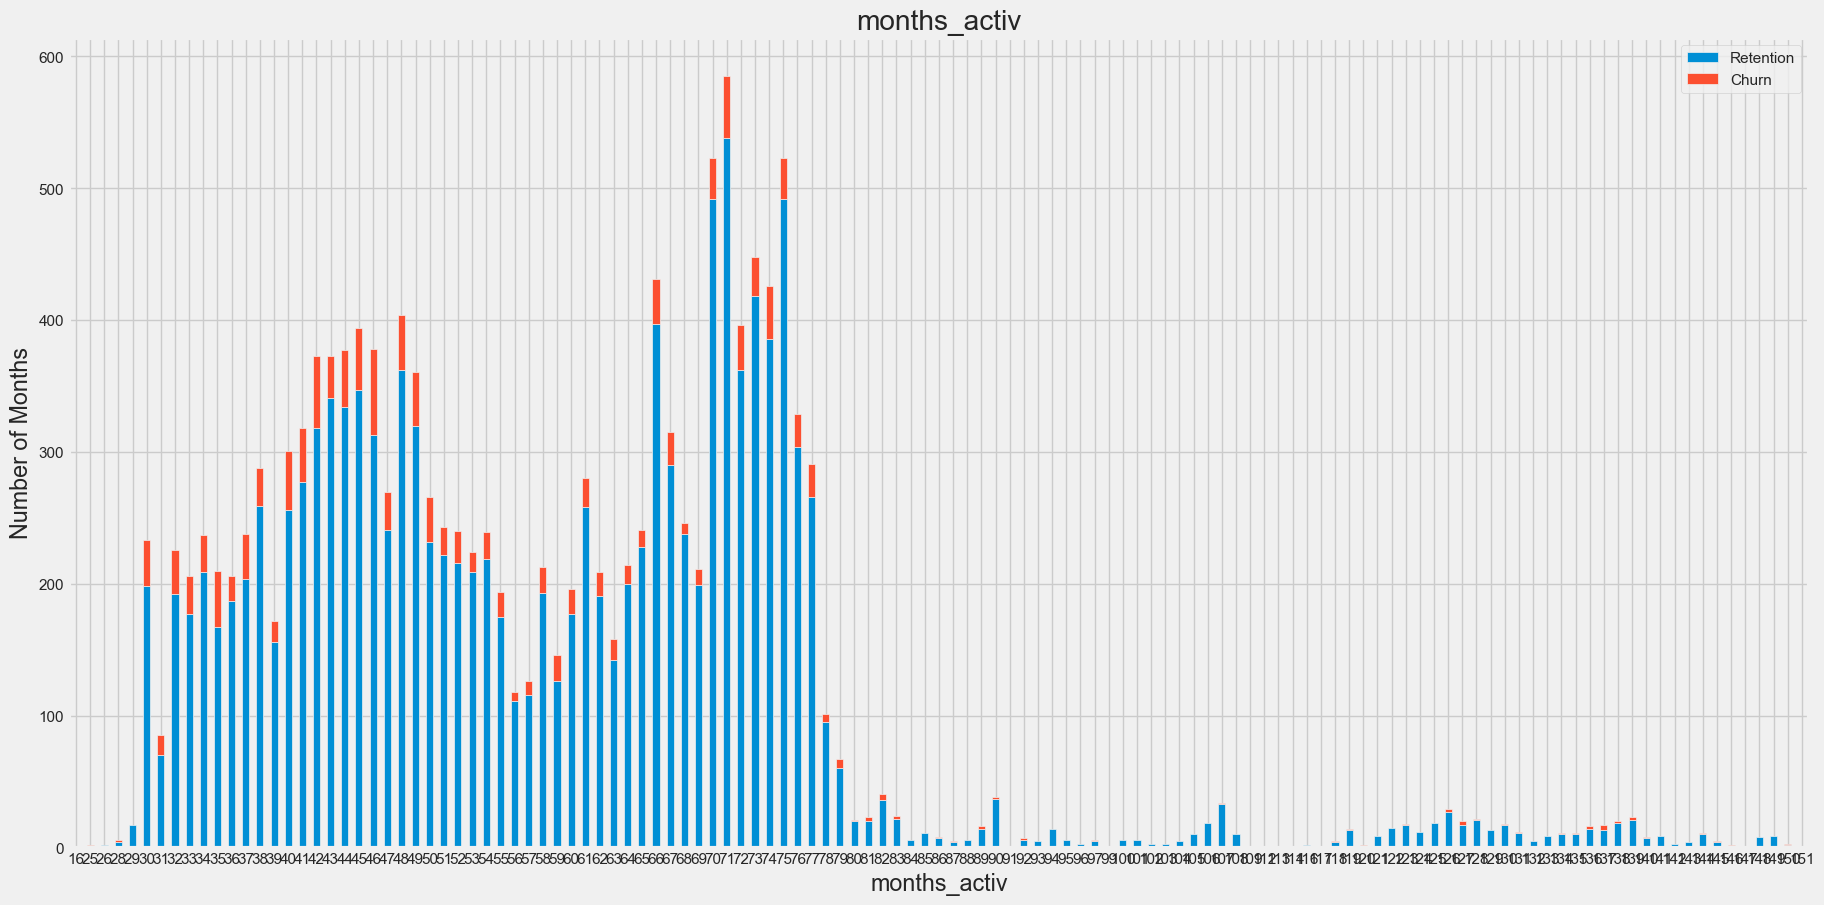

In [83]:
plot_monthly_churn(churn_data, 'months_activ')

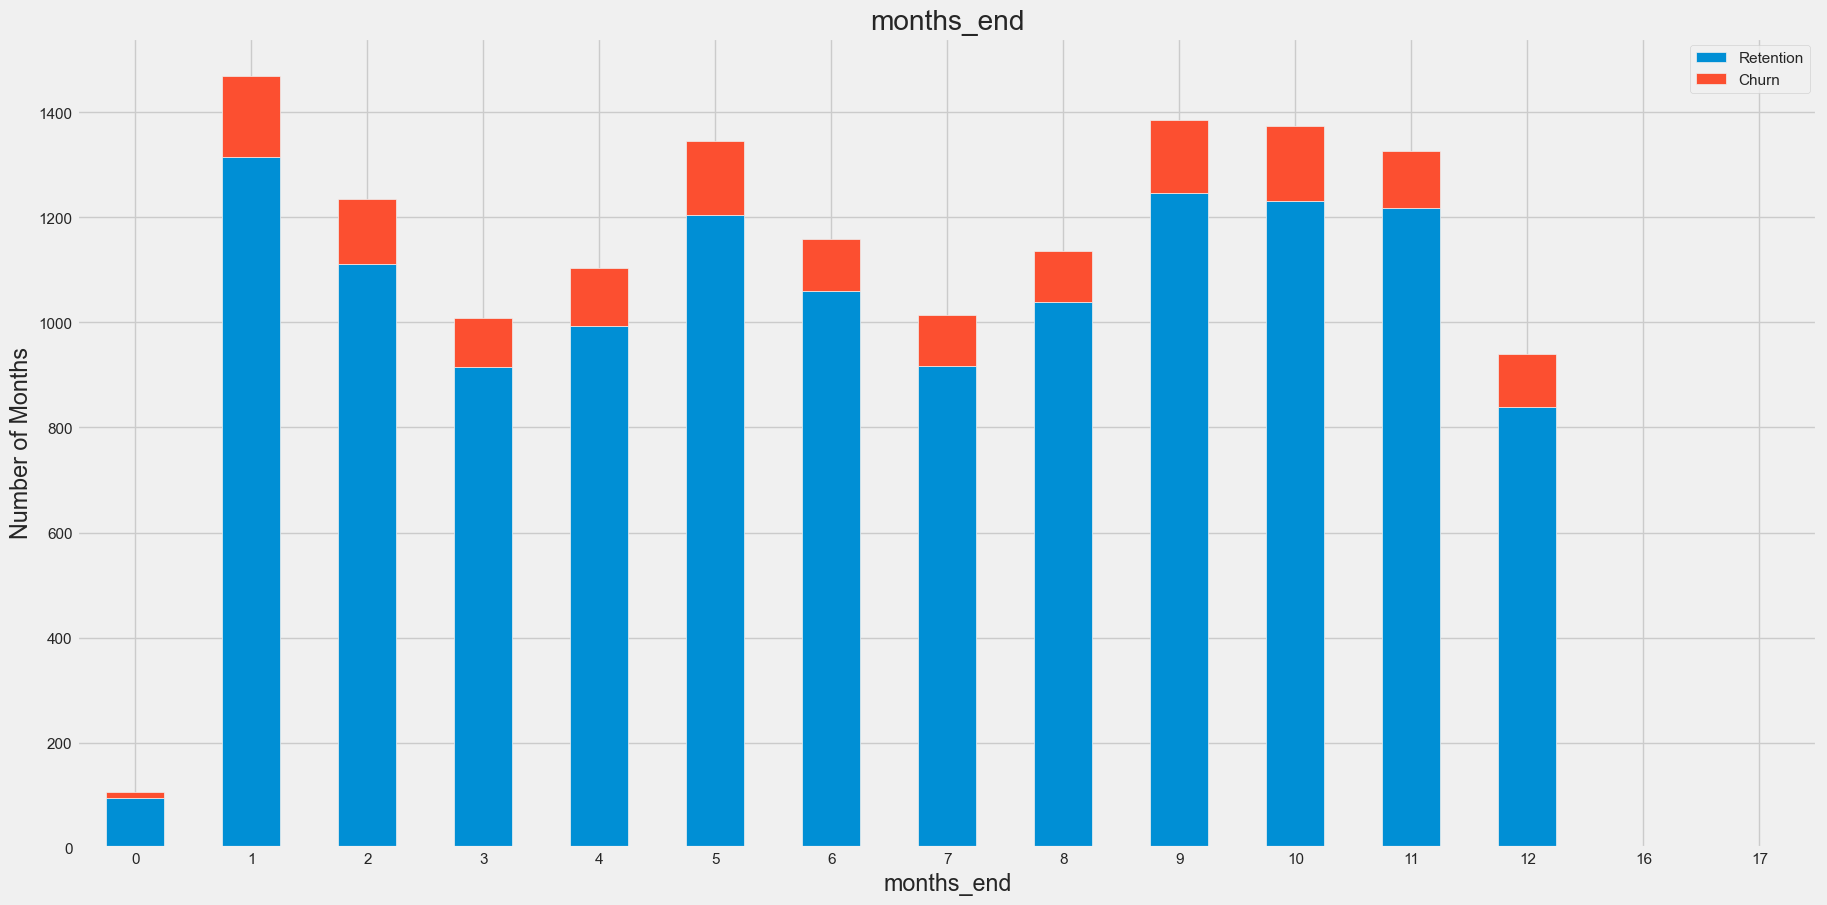

In [84]:
plot_monthly_churn(churn_data, 'months_end')

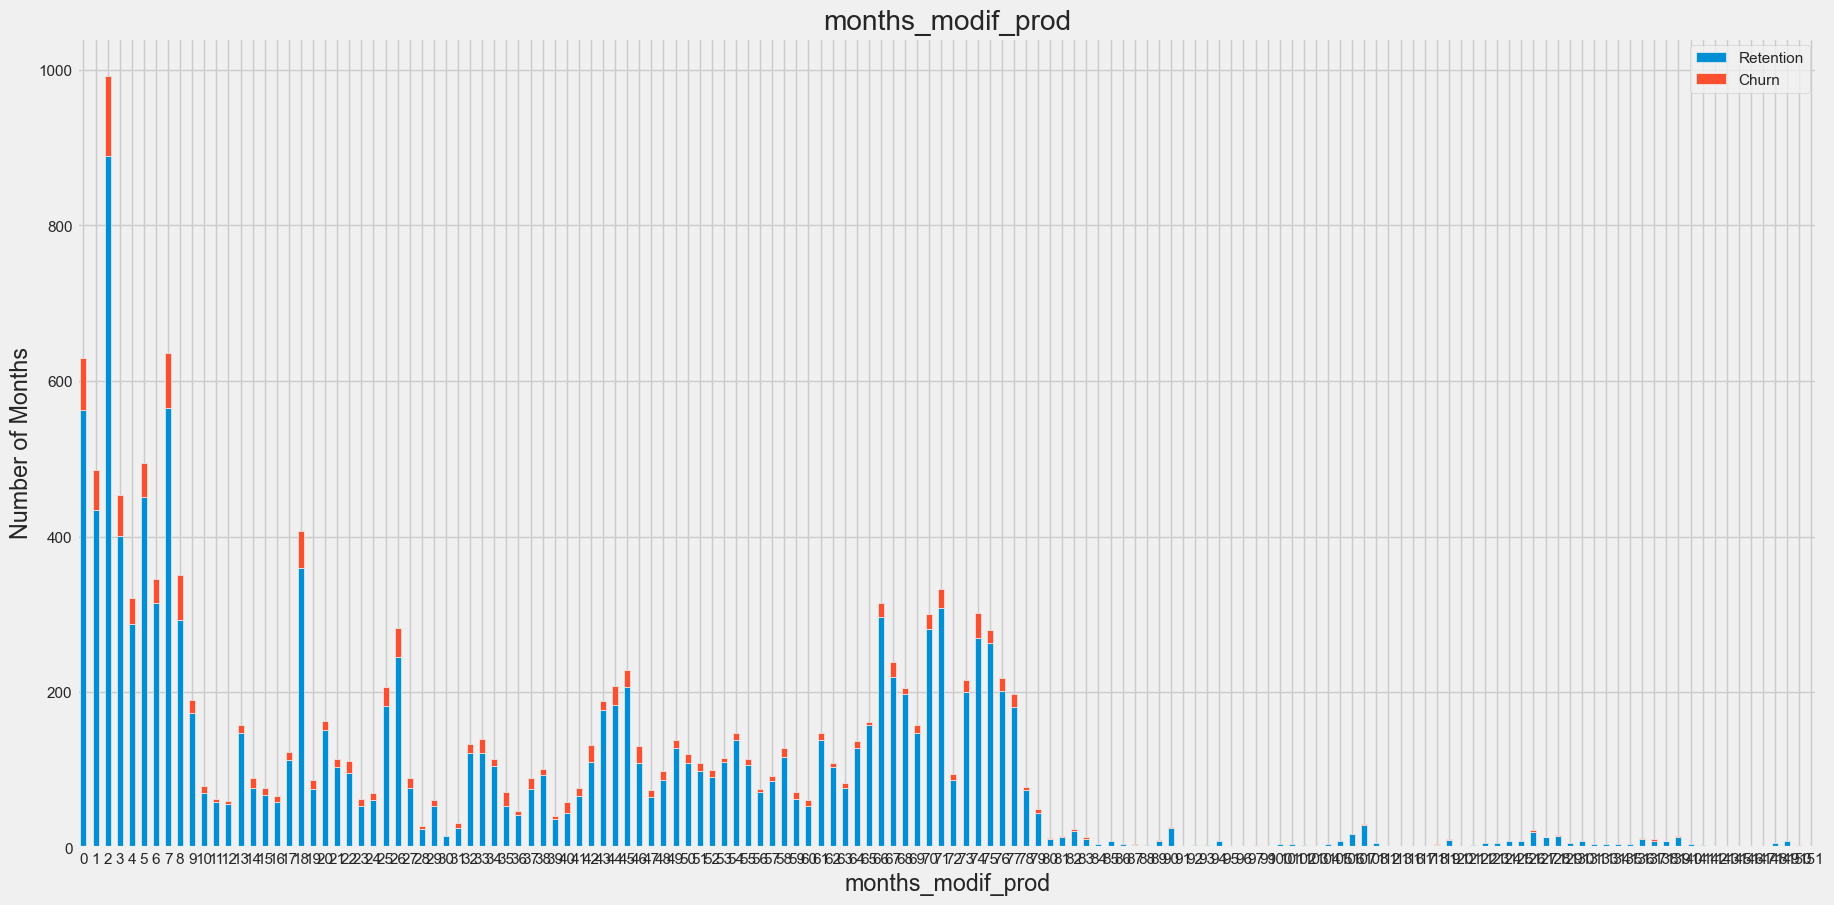

In [85]:
plot_monthly_churn(churn_data, 'months_modif_prod')

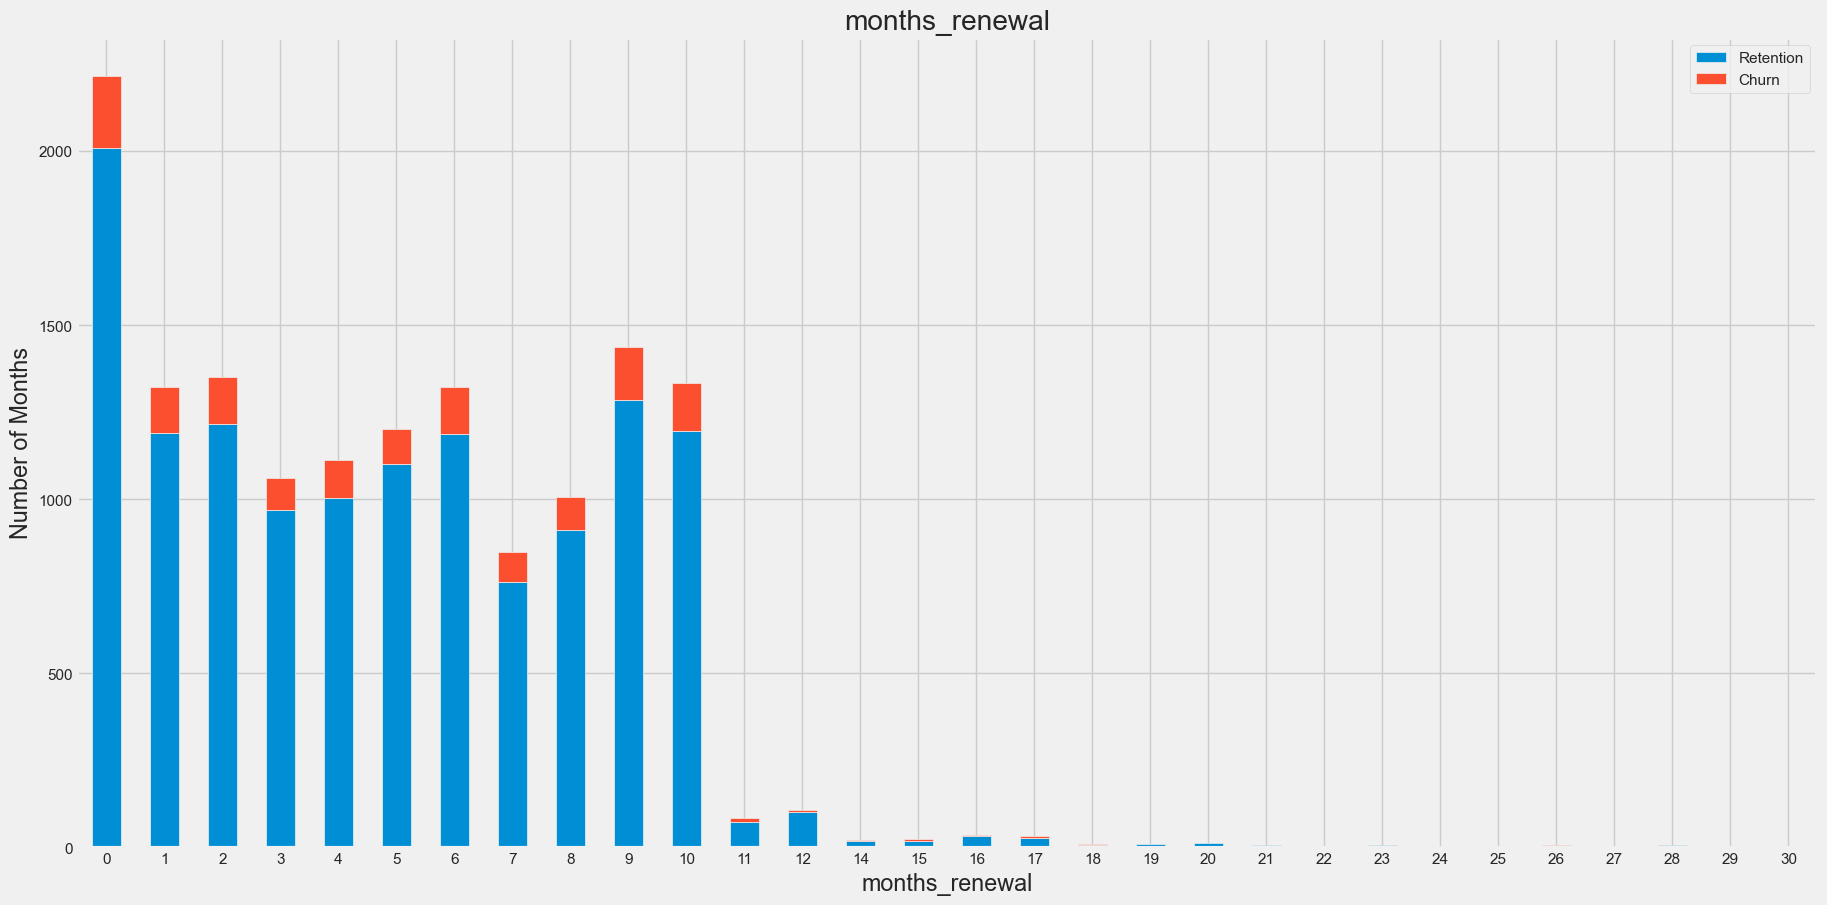

In [86]:
plot_monthly_churn(churn_data, 'months_renewal')

In [87]:
#Removing date columns

churn_data.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], inplace=True)

In [88]:
#Boolean Data Transformation
#For the column has_gas, we will replace t for True or 1 and f for False or 0 (onehot encoding)

churn_data['has_gas'] = churn_data['has_gas'].replace(['t', 'f'], [1,0])

Categorical data and dummy variables

Categorical data channel_sales

Categorical data channel_sales What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0 s and 1 s depending whether than entry belongs to that particular category or not First of all let's replace the Nan values with a string called null_values_channel


In [89]:
churn_data['channel_sales'] = churn_data['channel_sales'].fillna('null_channels')

Now transform the channel_sales column into categorical data type

In [90]:
churn_data['channel_sales'] = churn_data['channel_sales'].astype('category')
churn_data['channel_sales'].value_counts().reset_index()

,index,channel_sales
0,foosdfpfkusacimwkcsosbicdxkicaua,6754
1,MISSING,3725
2,lmkebamcaaclubfxadlmueccxoimlema,1843
3,usilxuppasemubllopkaafesmlibmsdf,1375
4,ewpakwlliwisiwduibdlfmalxowmwpci,893
5,sddiedcslfslkckwlfkdpoeeailfpeds,11
6,epumfxlbckeskwekxbiuasklxalciiuu,3
7,fixdbufsefwooaasfcxdxadsiekoceaa,2


So that means we will create 8 different dummy variables . Each variable will become a different column.

In [91]:
# Dummy Variables
channels_category = pd.get_dummies(churn_data['channel_sales'] , prefix='channel')
channels_category.columns = [col[:11] for col in channels_category.columns]
channels_category.head(10)

,channel_MIS,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0


In [92]:
#Categorical data origin_up

churn_data['origin_up'] = churn_data['origin_up'].fillna('null_origin')
churn_data['origin_up'] = churn_data['origin_up'].astype('category')


churn_data['origin_up'].value_counts().reset_index()

,index,origin_up
0,lxidpiddsbxsbosboudacockeimpuepw,7097
1,kamkkxfxxuwbdslkwifmmcsiusiuosws,4294
2,ldkssxwpmemidmecebumciepifcamkci,3148
3,MISSING,64
4,usapbepcfoloekilkwsdiboslwaxobdp,2
5,ewxeelcelemmiwuafmddpobolfuxioce,1


In [93]:
origin_categories = pd.get_dummies(churn_data['origin_up'] , prefix='origin')
origin_categories.columns = [col[:11] for col in origin_categories.columns]

origin_categories.head(10)

,origin_MISS,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0
8,0,0,1,0,0,0
9,0,0,0,0,1,0


### High Correlation Features

In [94]:
features = mean_year

correlation = features.corr()

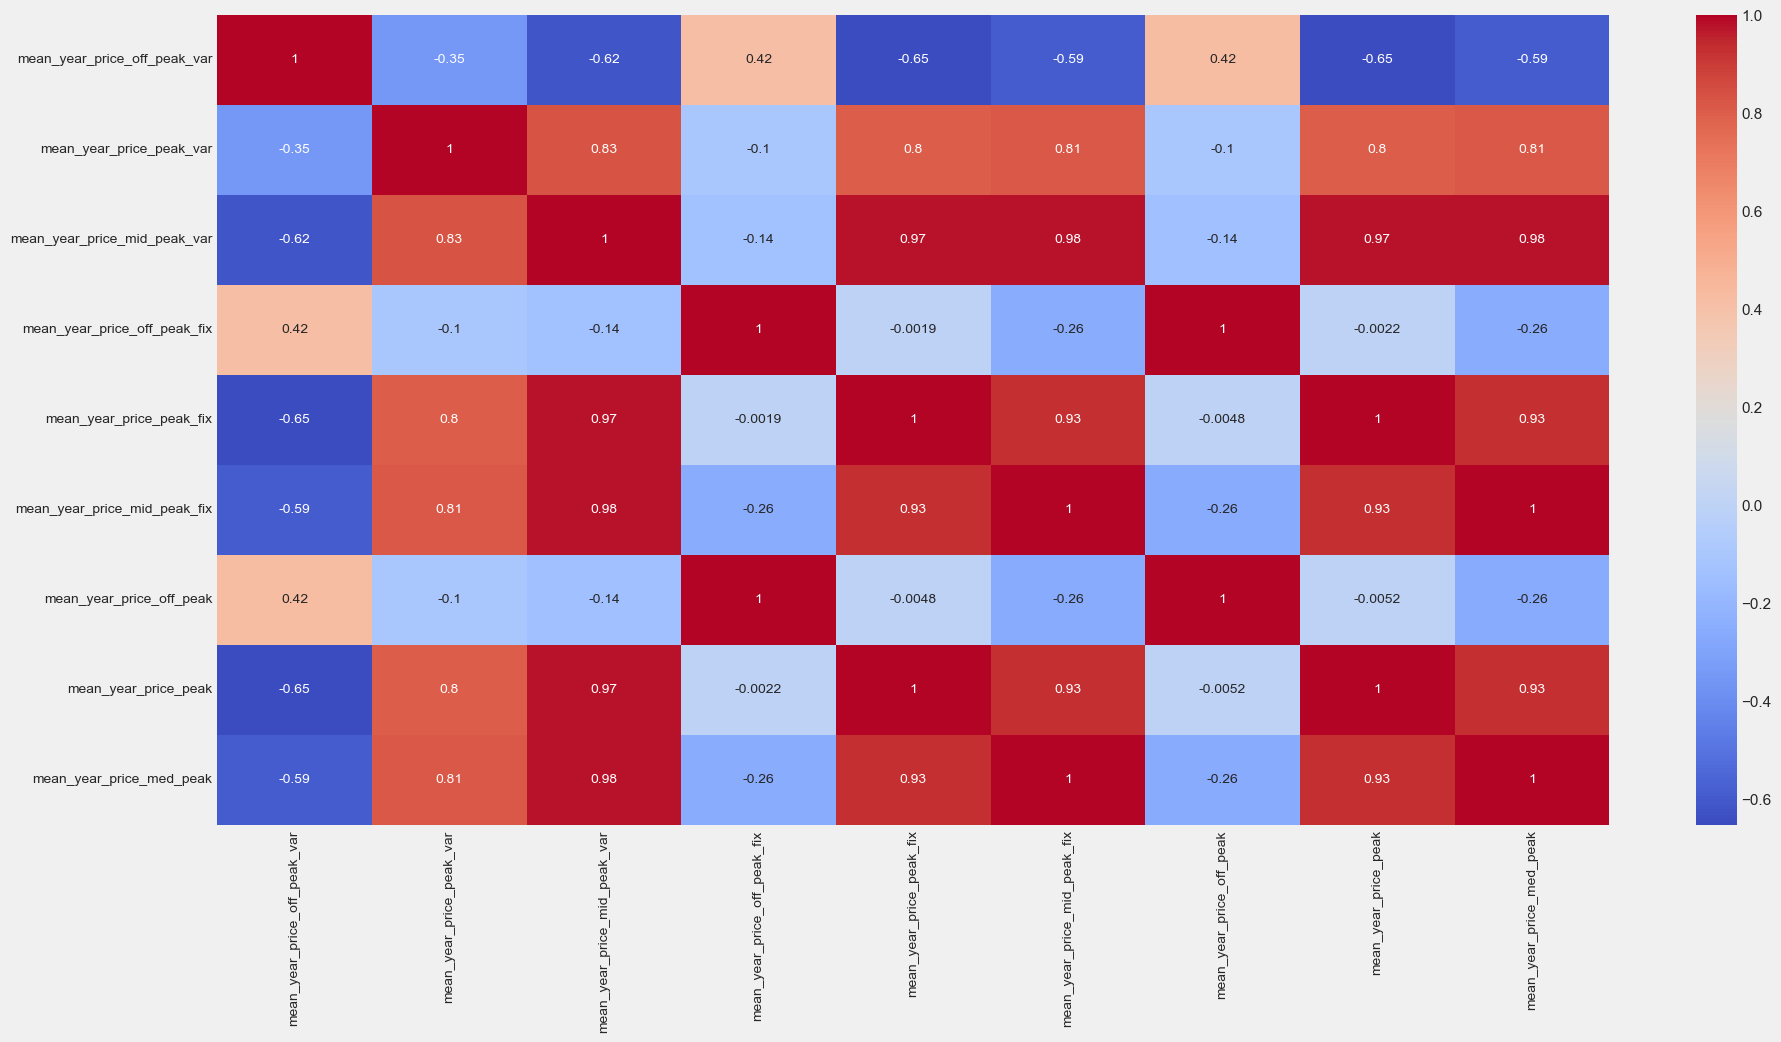

In [95]:
plt.figure(figsize=(20,10))

sns.heatmap(correlation, cmap ='coolwarm',  xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True,
           annot_kws={'size' : 10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show();

In [96]:
#We can remove highly correlated variables.

correlation = churn_data.corr()
correlation

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn,tenure,months_activ,months_end,months_modif_prod,months_renewal
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,...,0.055014,-0.011230,0.052020,0.054996,-0.045968,-0.028522,-0.016249,-0.051148,0.117373,0.032982
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,...,0.046724,-0.013720,0.042641,0.046716,-0.037957,-0.014543,-0.015803,0.009261,0.049467,-0.011506
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,...,0.050241,-0.009756,0.047978,0.050226,-0.045284,-0.023946,-0.015746,-0.040025,0.113164,0.023450
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,...,0.234611,0.013830,0.256596,0.234658,0.012949,-0.001054,0.016777,-0.063014,0.011510,0.072821
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,...,0.223742,-0.025866,0.250995,0.223793,-0.002558,0.025255,0.042931,-0.052947,0.044306,0.051044
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,...,-0.001090,0.037568,-0.005864,-0.000983,0.017026,-0.099069,-0.071499,-0.060698,-0.181002,0.194381
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,...,0.855593,-0.168405,0.885395,0.855690,0.044245,0.056186,0.069377,-0.037690,0.024591,0.025832
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,...,-0.643848,0.577001,-0.663736,-0.643869,-0.010837,-0.154579,-0.166302,-0.018623,-0.099377,0.079091
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,...,0.795490,-0.205008,0.791580,0.795554,0.029315,0.058389,0.079032,-0.055570,0.047523,0.060466
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,...,-0.370152,0.933830,-0.264582,-0.369957,0.014778,-0.089747,-0.115822,0.036366,-0.083131,-0.023260


### Log Transformation 

There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log transformation which is usually recommended for right skewed data.

In [97]:
churn_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn,tenure,months_activ,months_end,months_modif_prod,months_renewal
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,...,6.083658,43.061046,9.493590,6.111880,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,...,7.763955,4.564817,12.087613,7.799434,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.000000,40.830297,0.000000,0.000000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,...,0.000000,44.417290,0.084640,0.000000,0.000000,5.000000,57.000000,6.000000,30.000000,5.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,16.226386,44.491644,24.455680,16.303325,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,16.791555,59.724135,36.591701,16.890826,1.000000,13.000000,151.000000,17.000000,151.000000,30.000000


Columns having large standard deviation std need log trnsformation for skewness. Log transformation doesnot work with negative data, in such case we will convert the values to Nan. Also for 0 data we will add 1 then apply Log transformation.

In [98]:
# Removing negative data

churn_data.loc[churn_data['cons_12m'] < 0 , 'cons_12m'] = np.nan
churn_data.loc[churn_data['cons_gas_12m'] < 0 , 'cons_gas_12m'] = np.nan
churn_data.loc[churn_data['cons_last_month'] < 0 , 'cons_last_month'] = np.nan
churn_data.loc[churn_data['forecast_cons_12m'] < 0 , 'forecast_cons_12m'] = np.nan
churn_data.loc[churn_data['forecast_cons_year'] < 0 , 'forecast_cons_year'] = np.nan
churn_data.loc[churn_data['forecast_meter_rent_12m'] < 0 , 'forecast_meter_rent_12m'] = np.nan
churn_data.loc[churn_data['imp_cons'] < 0 , 'imp_cons'] = np.nan

In [99]:
# Applying Log Transformation

churn_data['cons_12m'] = np.log10(churn_data['cons_12m']+1)
churn_data['cons_gas_12m'] = np.log10(churn_data['cons_gas_12m']+1)
churn_data['cons_last_month'] = np.log10(churn_data['cons_last_month']+1)
churn_data['forecast_cons_12m'] = np.log10(churn_data['forecast_cons_12m']+1)
churn_data['forecast_cons_year'] = np.log10(churn_data['forecast_cons_year']+1)
churn_data['forecast_meter_rent_12m'] = np.log10(churn_data['forecast_meter_rent_12m']+1)
churn_data['imp_cons'] = np.log10(churn_data['imp_cons']+1)

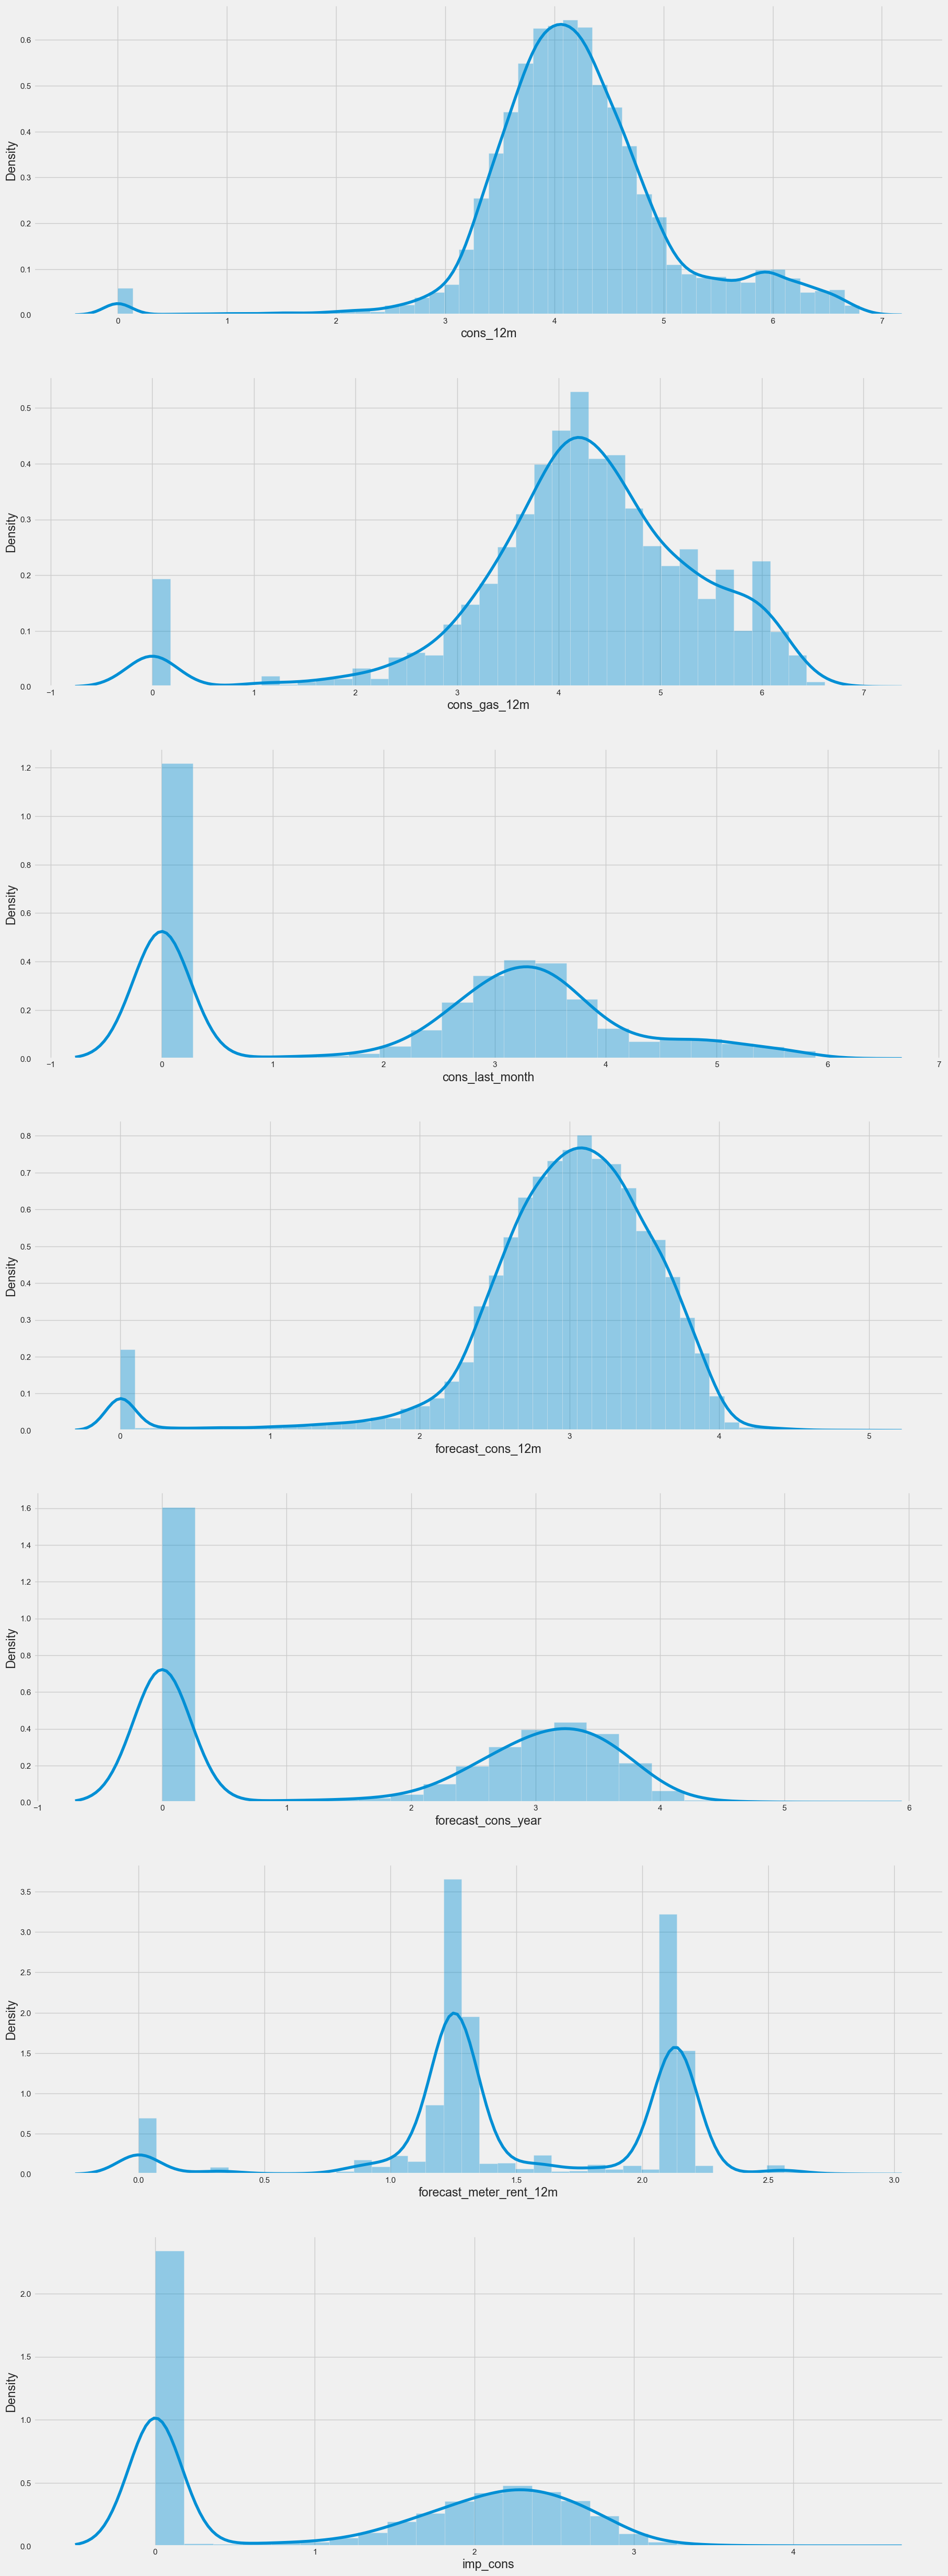

In [100]:
fig, axs = plt.subplots(nrows=7, figsize=(20,60))
sns.distplot((churn_data['cons_12m'].dropna()), ax=axs[0])
sns.distplot((churn_data[churn_data['has_gas']==1]['cons_gas_12m'].dropna()), ax=axs[1])
sns.distplot((churn_data['cons_last_month'].dropna()), ax=axs[2])
sns.distplot((churn_data['forecast_cons_12m'].dropna()), ax=axs[3])
sns.distplot((churn_data['forecast_cons_year'].dropna()), ax=axs[4])
sns.distplot((churn_data['forecast_meter_rent_12m'].dropna()), ax=axs[5])
sns.distplot((churn_data['imp_cons'].dropna()), ax=axs[6])
plt.show()

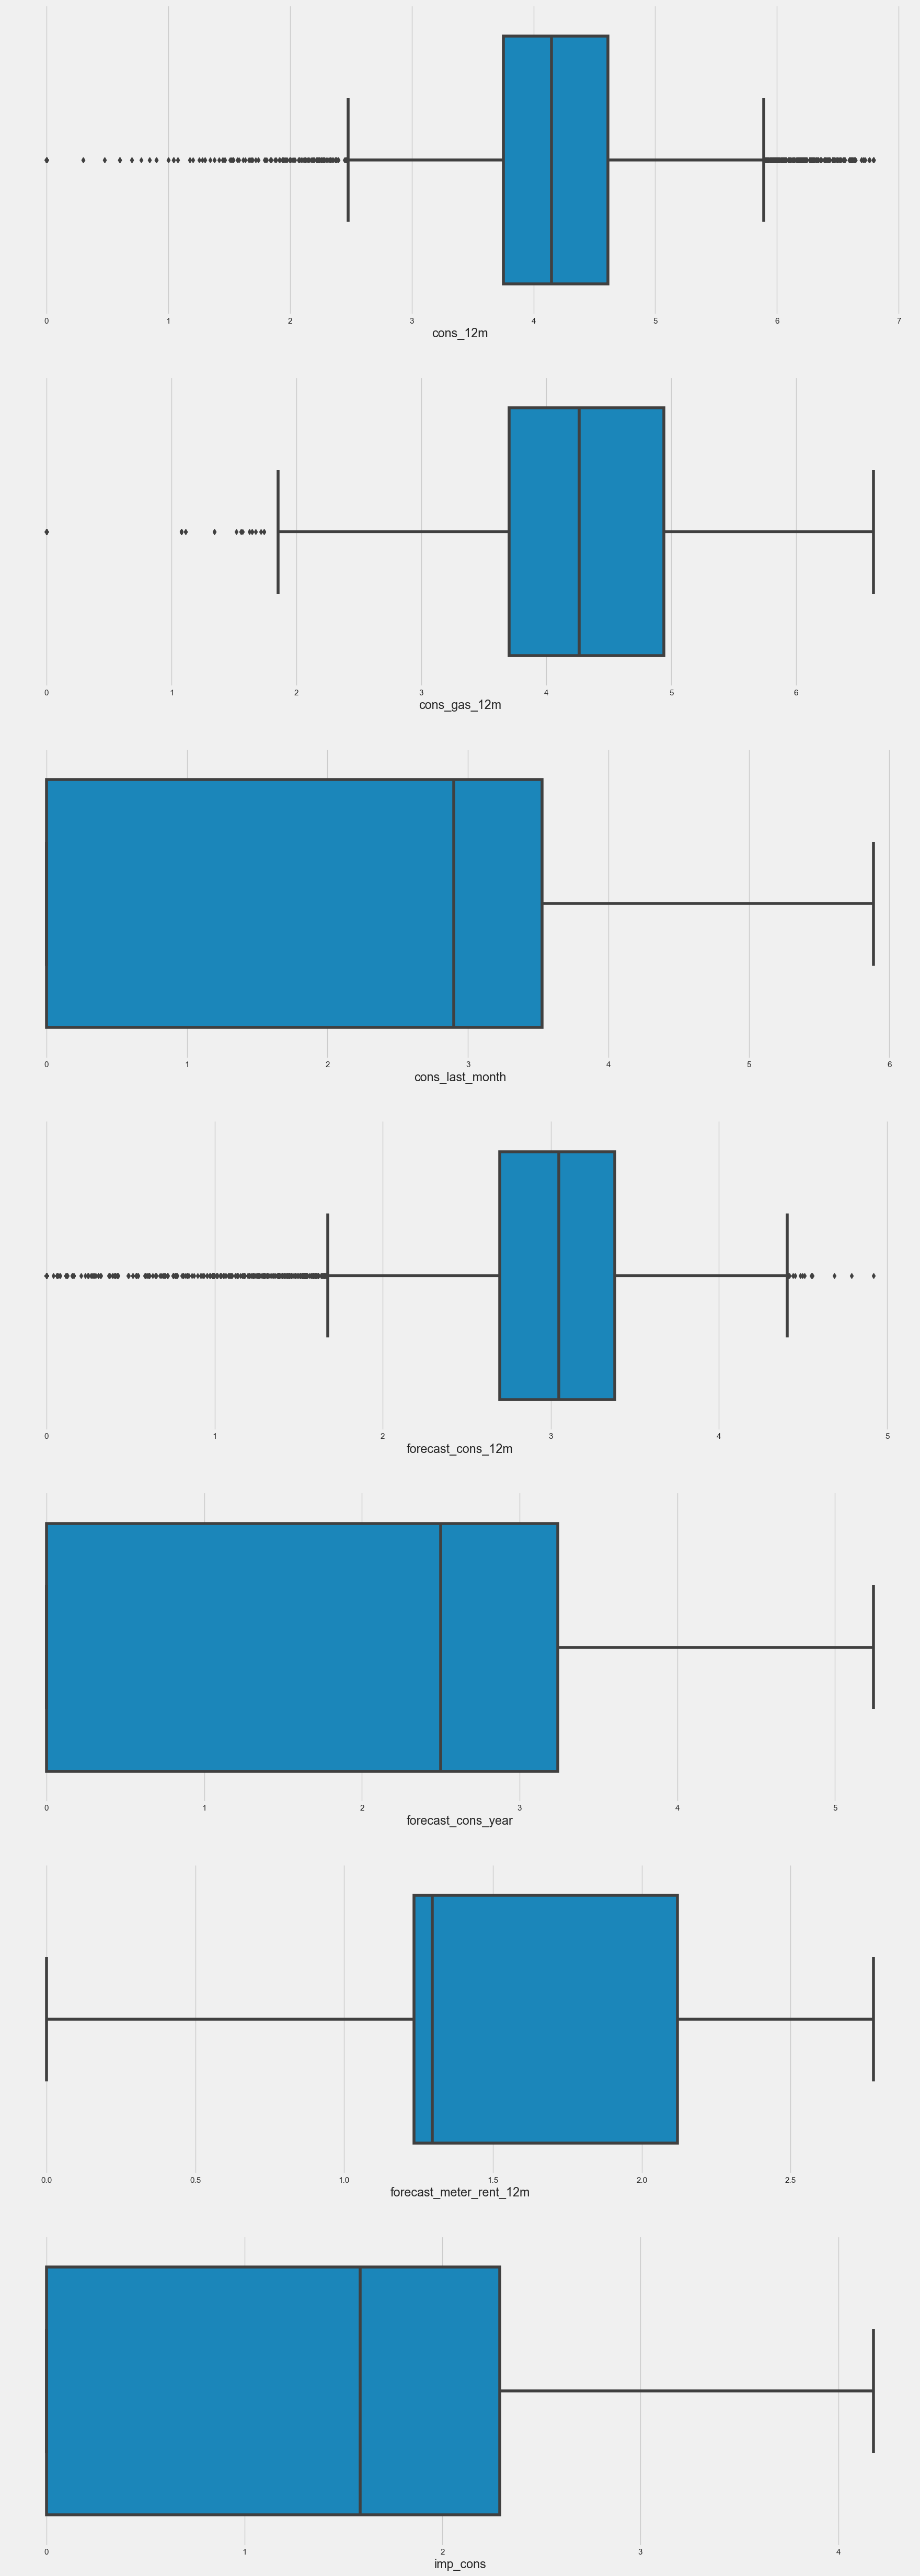

In [101]:
fig, axs = plt.subplots(nrows=7, figsize=(20,60))
sns.boxplot((churn_data['cons_12m'].dropna()), ax=axs[0])
sns.boxplot((churn_data[churn_data['has_gas']==1]['cons_gas_12m'].dropna()), ax=axs[1])
sns.boxplot((churn_data['cons_last_month'].dropna()), ax=axs[2])
sns.boxplot((churn_data['forecast_cons_12m'].dropna()), ax=axs[3])
sns.boxplot((churn_data['forecast_cons_year'].dropna()), ax=axs[4])
sns.boxplot((churn_data['forecast_meter_rent_12m'].dropna()), ax=axs[5])
sns.boxplot((churn_data['imp_cons'].dropna()), ax=axs[6])
plt.show()

In [102]:
churn_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn,tenure,months_activ,months_end,months_modif_prod,months_renewal
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056,...,6.083658,43.061046,9.493590,6.111880,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988,...,7.763955,4.564817,12.087613,7.799434,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,...,0.000000,40.830297,0.000000,0.000000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,...,0.000000,44.417290,0.084640,0.000000,0.000000,5.000000,57.000000,6.000000,30.000000,5.000000
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378,...,16.226386,44.491644,24.455680,16.303325,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378,...,16.791555,59.724135,36.591701,16.890826,1.000000,13.000000,151.000000,17.000000,151.000000,30.000000


From the boxplots we can still see some values are quite far from the range ( outliers ).

## Outliers Removal


##### The consumption data has several outliers, Need to remove those outliers.they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy

##### We will replace the outliers with the mean (average of the values excluding outliers).

In [103]:
# Replace outliers with the mean values using the Z score.
# Nan values are also replaced with the mean values.

def replace_z_score(df, col, z=3):
    
    from scipy.stats import zscore
    
    temp_df = df.copy(deep=True)
    temp_df.dropna(inplace=True, subset=[col])
    
    temp_df["zscore"] = zscore(df[col])
    mean_=temp_df[(temp_df['zscore'] > -z) & (temp_df['zscore'] < z)][col].mean()
    
    df[col] = df[col].fillna(mean_)
    df['zscore']=zscore(df[col])
    no_outlier=df[(df['zscore'] < -z) | (df['zscore'] > z)].shape[0]
    df.loc[(df['zscore'] < -z) | (df['zscore'] > z) , col] = mean_
    
    print('Replaced : {} outliers in {}'.format(no_outlier, col))
    return df.drop(columns='zscore')

In [104]:
for feat in features.columns:
    
    if feat!='id':
        features = replace_z_score(features, feat)

Replaced : 276 outliers in mean_year_price_off_peak_var
Replaced : 0 outliers in mean_year_price_peak_var
Replaced : 0 outliers in mean_year_price_mid_peak_var
Replaced : 120 outliers in mean_year_price_off_peak_fix
Replaced : 0 outliers in mean_year_price_peak_fix
Replaced : 0 outliers in mean_year_price_mid_peak_fix
Replaced : 122 outliers in mean_year_price_off_peak
Replaced : 0 outliers in mean_year_price_peak
Replaced : 0 outliers in mean_year_price_med_peak


In [105]:
features.reset_index(drop=True, inplace=True)

In [106]:
def find_outliers_iqr(df, column):
    
    col = sorted(df[column])
    
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    
    results_ouliers = {'iqr' : iqr , 'lower_bound' : lower_bound , 'upper_bound' : upper_bound}
    
    return results_ouliers

In [107]:
def remove_ouliers_iqr(df, column):
    
    outliers = find_outliers_iqr(df,column)
    removed_outliers = df[(df[col] < outliers['lower_bound']) | (df[col] > outliers['upper_bound'])].shape
    
    df = df[(df[col] > outliers['lower_bound']) | (df[col] < outliers['upper_bound'])] 
    print('Removed {} outliers'.format(removed_outliers[0]))
    return df

In [108]:
def remove_outliers_zscore(df, col, z=3):
    
    from scipy.stats import zscore
    
    df["zsscore"]=zscore(df[col])
    removed_outliers = df[(df["zscore"] < -z) | (df["zscore"] > z)].shape
    df = df[(df["zscore"] > -z) | (df["zscore"] < z)]
    
    print('Removed: {} otliers of {}'.format(removed_outliers[0], col))
    
    return df.drop(columns="zscore")

In [109]:
def replace_outliers_z_score(df, col, z=3):
    
    from scipy.stats import zscore
    
    temp_df = df.copy(deep=True)
    #temp_df.dropna(inplace=True, subset=[col])
    
    temp_df["zscore"] = zscore(df[col])
    mean_=temp_df[(temp_df["zscore"] > -z) & (temp_df["zscore"] < z)][col].mean()
    
    num_outliers = df[col].isnull().sum()
    df[col] = df[col].fillna(mean_)
    df["zscore"]=zscore(df[col])
    df.loc[(df["zscore"] < -z) | (df["zscore"] > z) , col] = mean_
    
    print('Replaced : {} outliers in {}'.format(num_outliers, col))
    return df.drop(columns="zscore")

In [110]:
churn_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn,tenure,months_activ,months_end,months_modif_prod,months_renewal
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056,...,6.083658,43.061046,9.493590,6.111880,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988,...,7.763955,4.564817,12.087613,7.799434,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,...,0.000000,40.830297,0.000000,0.000000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,...,0.000000,44.417290,0.084640,0.000000,0.000000,5.000000,57.000000,6.000000,30.000000,5.000000
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378,...,16.226386,44.491644,24.455680,16.303325,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378,...,16.791555,59.724135,36.591701,16.890826,1.000000,13.000000,151.000000,17.000000,151.000000,30.000000


In [111]:
churn_data = replace_outliers_z_score(churn_data , 'cons_12m')
churn_data = replace_outliers_z_score(churn_data , 'cons_gas_12m')
churn_data = replace_outliers_z_score(churn_data , 'cons_last_month')
churn_data = replace_outliers_z_score(churn_data , 'forecast_cons_12m')
churn_data = replace_outliers_z_score(churn_data , 'forecast_discount_energy')
churn_data = replace_outliers_z_score(churn_data , 'forecast_meter_rent_12m')
churn_data = replace_outliers_z_score(churn_data , 'forecast_price_energy_off_peak')
churn_data = replace_outliers_z_score(churn_data , 'forecast_price_energy_peak')
churn_data = replace_outliers_z_score(churn_data , 'forecast_price_energy_peak')
churn_data = replace_outliers_z_score(churn_data , 'imp_cons')
churn_data = replace_outliers_z_score(churn_data , 'margin_gross_pow_ele')
churn_data = replace_outliers_z_score(churn_data , 'margin_net_pow_ele')
churn_data = replace_outliers_z_score(churn_data , 'net_margin')
churn_data = replace_outliers_z_score(churn_data , 'pow_max')
churn_data = replace_outliers_z_score(churn_data , 'months_activ')
churn_data = replace_outliers_z_score(churn_data , 'months_end')
churn_data = replace_outliers_z_score(churn_data , 'months_modif_prod')
churn_data = replace_outliers_z_score(churn_data , 'months_renewal')

Replaced : 0 outliers in cons_12m
Replaced : 0 outliers in cons_gas_12m
Replaced : 0 outliers in cons_last_month
Replaced : 0 outliers in forecast_cons_12m
Replaced : 0 outliers in forecast_discount_energy
Replaced : 0 outliers in forecast_meter_rent_12m
Replaced : 0 outliers in forecast_price_energy_off_peak
Replaced : 0 outliers in forecast_price_energy_peak
Replaced : 0 outliers in forecast_price_energy_peak
Replaced : 0 outliers in imp_cons
Replaced : 0 outliers in margin_gross_pow_ele
Replaced : 0 outliers in margin_net_pow_ele
Replaced : 0 outliers in net_margin
Replaced : 0 outliers in pow_max
Replaced : 0 outliers in months_activ
Replaced : 0 outliers in months_end
Replaced : 0 outliers in months_modif_prod
Replaced : 0 outliers in months_renewal


In [112]:
churn_data.reset_index(drop=True, inplace=True)

#### Let's see how the boxplots changed!



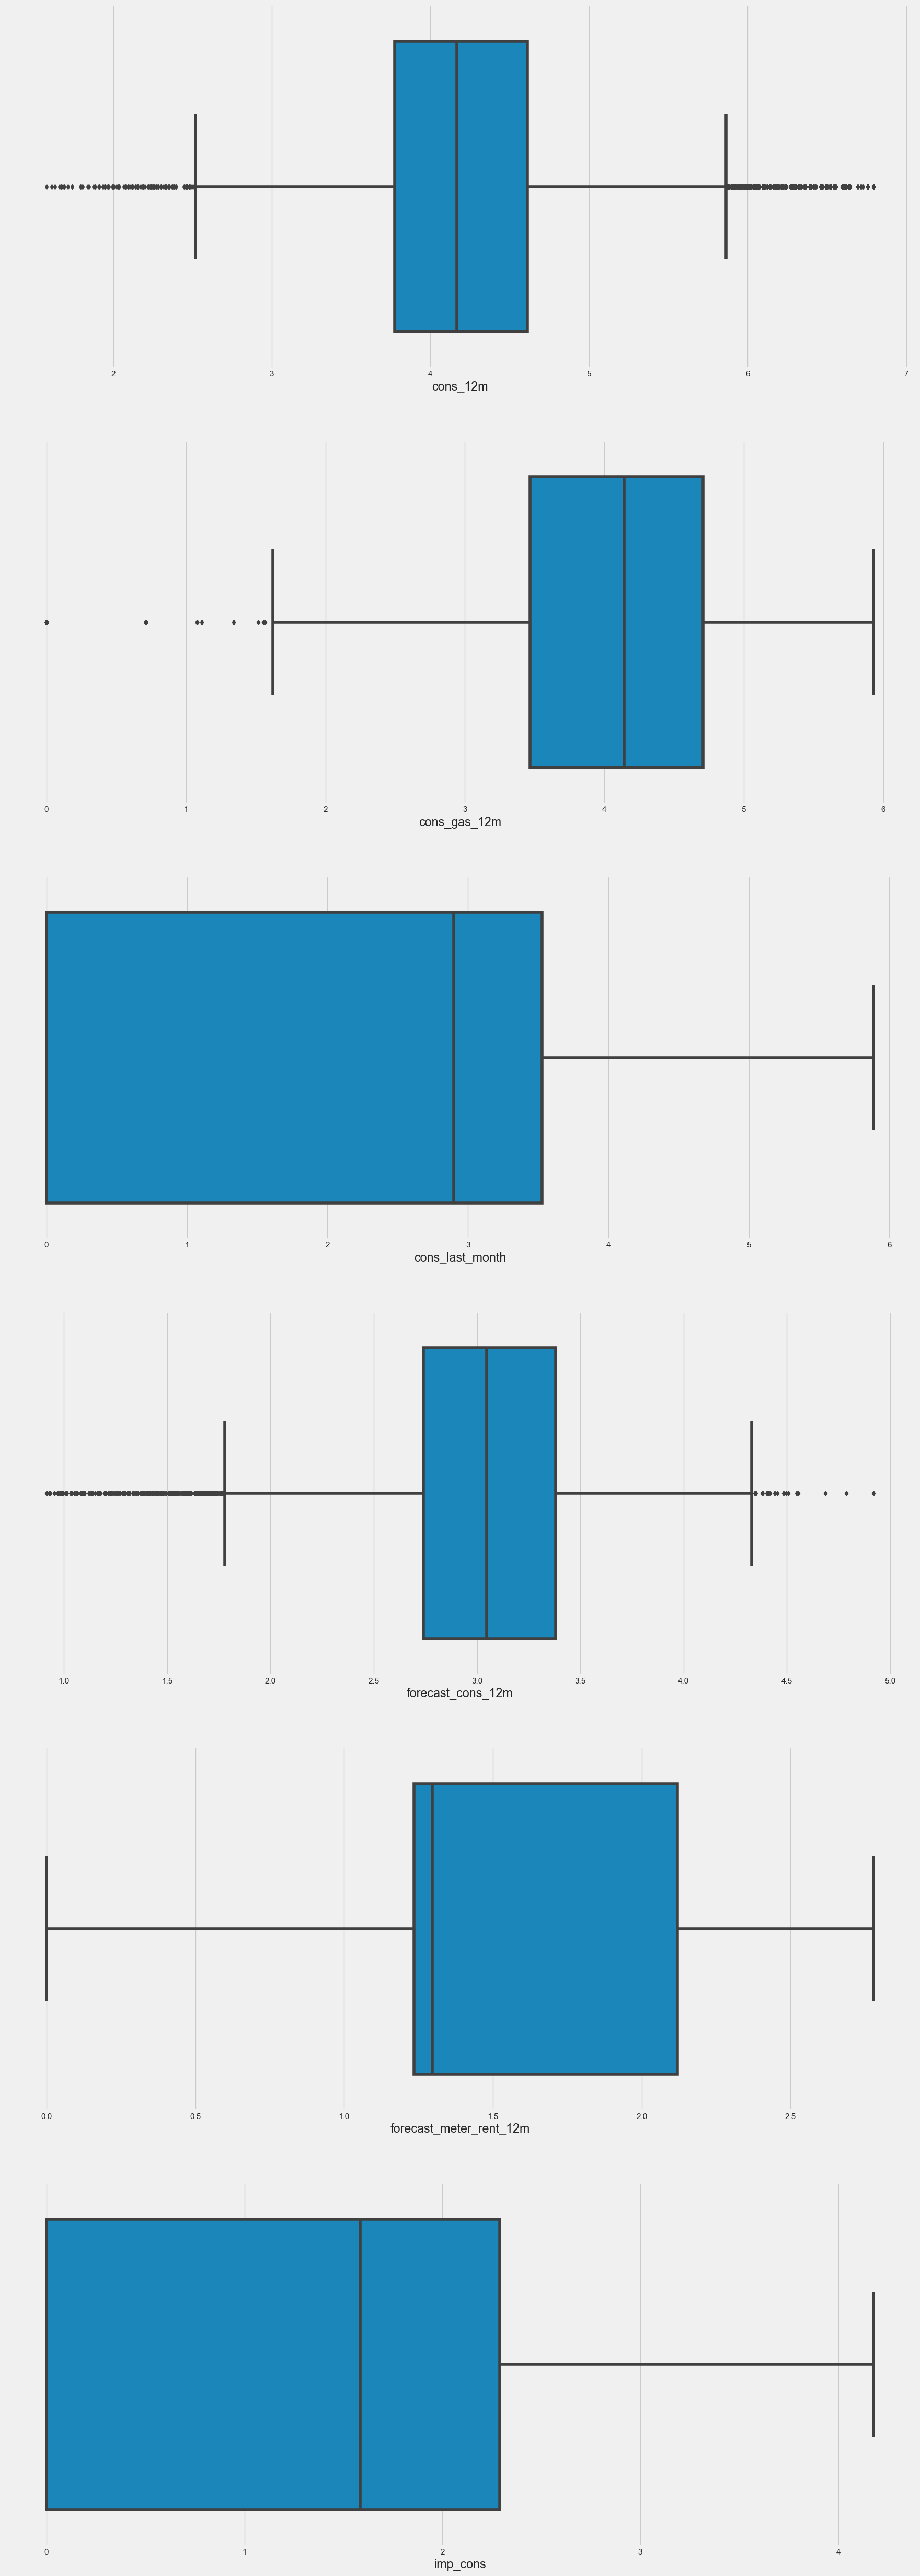

In [113]:
fig, axs = plt.subplots(nrows=6, figsize=(20,60))
sns.boxplot((churn_data['cons_12m'].dropna()), ax=axs[0])
sns.boxplot((churn_data[churn_data['has_gas']==1]['cons_gas_12m'].dropna()), ax=axs[1])
sns.boxplot((churn_data['cons_last_month'].dropna()), ax=axs[2])
sns.boxplot((churn_data['forecast_cons_12m'].dropna()), ax=axs[3])
sns.boxplot((churn_data['forecast_meter_rent_12m'].dropna()), ax=axs[4])
sns.boxplot((churn_data['imp_cons'].dropna()), ax=axs[5])
plt.show()

In [116]:
churn_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,churn,tenure,months_activ,months_end,months_modif_prod,months_renewal
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.268365,0.712699,2.264646,3.041639,1.784610,0.001064,1.517203,0.137140,0.050491,43.130056,...,6.083658,43.061046,9.493590,6.111880,0.097152,5.317952,56.584417,6.392084,34.483443,4.788119
std,0.778083,1.610951,1.769305,0.488586,1.584986,0.092507,0.571481,0.019310,0.049037,4.485988,...,7.763955,4.564817,12.087613,7.799434,0.296175,1.695866,15.102575,3.510837,28.562759,3.515606
min,1.579784,0.000000,0.000000,0.916980,0.000000,0.000000,0.000000,0.092453,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000
25%,3.772762,0.000000,0.000000,2.739723,0.000000,0.000000,1.235023,0.116509,0.000000,40.606701,...,0.000000,40.830297,0.000000,0.000000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000
50%,4.165215,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,...,0.000000,44.417290,0.084640,0.000000,0.000000,5.000000,56.584417,6.000000,30.000000,5.000000
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378,...,16.226386,44.491644,24.455680,16.303325,0.000000,6.000000,70.000000,9.000000,63.000000,8.000000
max,6.792889,5.930252,5.887169,4.918575,5.243970,10.000000,2.778376,0.210689,0.195975,59.266378,...,16.791555,59.724135,36.591701,16.890826,1.000000,13.000000,116.000000,16.000000,126.000000,16.000000


In [117]:
cust_churn = pd.merge(client_df,churn_df,left_on='id', right_on='id', how='inner')

In [118]:
train = pd.merge(cust_churn, price_df, on='id')

In [119]:
pd.DataFrame({'Columns' : train.columns})

,Columns
0,id
1,channel_sales
2,cons_12m
3,cons_gas_12m
4,cons_last_month
5,date_activ
6,date_end
7,date_modif_prod
8,date_renewal
9,forecast_cons_12m
